# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from datetime import datetime

# Import the Dataset

In [2]:
data = pd.read_csv("rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
data.shape

(693071, 57)

In [4]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

##### Removing irrelevant features

In [5]:
data = data.drop(['id', 'timestamp','timezone', 'product_id', 'surge_multiplier'], axis = 1)

In [6]:
data_x = data.drop("price", axis = 1)
data_y = data.iloc[:,8]
data = pd.concat([data_x, data_y], axis = 1)

##### Sample from data associated with Uber

In [7]:
data = data[data["cab_type"] == "Uber"].reset_index().drop(["index", "cab_type"], axis = 1)

In [8]:
data.columns

Index(['hour', 'day', 'month', 'datetime', 'source', 'destination', 'name',
       'distance', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'price'],
      dtype='object')

# EDA

### Data Visualization

<AxesSubplot:xlabel='count', ylabel='icon'>

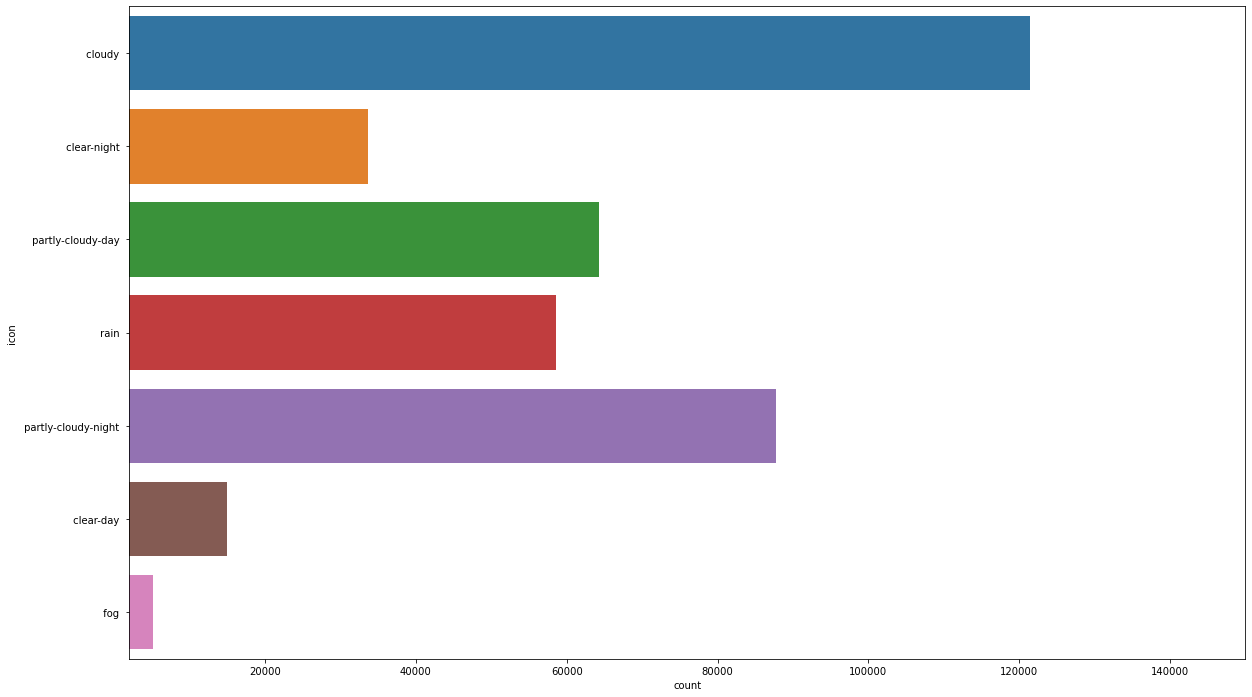

In [9]:
fig = plt.figure(figsize = (20,12))
plt.xlim(2000, 150000)
sns.countplot(y = "icon", data = data)

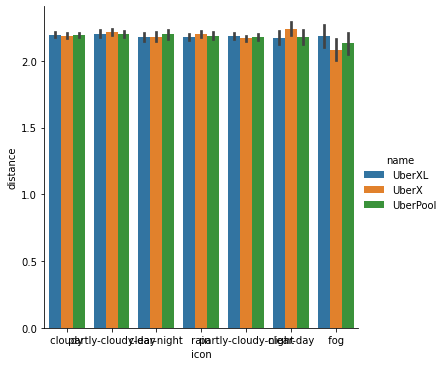

In [10]:
sns.catplot(x = "icon", y = "distance", hue = "name",kind = "bar", data = data[(data["name"] == "UberXL") | (data["name"] == "UberX") | (data["name"] == "UberPool")])

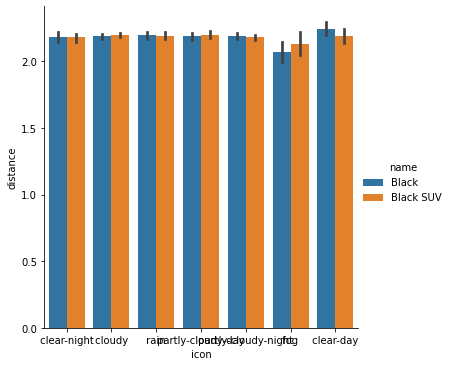

In [11]:
sns.catplot(x = "icon", y = "distance", hue = "name",kind = "bar", data = data[(data["name"] == "Black") | (data["name"] == "Black SUV")])

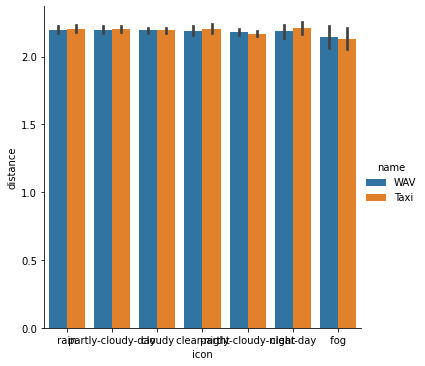

In [12]:
sns.catplot(x = "icon", y = "distance", hue = "name",kind = "bar", data = data[(data["name"] == "Taxi") | (data["name"] == "WAV")])

### Data manipulation

In [13]:
data[["name","distance","temperatureMin", "temperatureMax"]].groupby(["name"]).mean()

,distance,temperatureMin,temperatureMax
name,,,
Black,2.191399,33.451900,45.243680
Black SUV,2.191378,33.475143,45.275384
Taxi,2.191383,33.476342,45.277155
UberPool,2.191396,33.453702,45.253569
UberX,2.191390,33.423663,45.221049
UberXL,2.191378,33.426031,45.219920
WAV,2.191378,33.447161,45.237931


In [14]:
data[["name", 'precipProbability', 'precipIntensity']].groupby(["name"]).mean()

,precipProbability,precipIntensity
name,,
Black,0.148658,0.009139
Black SUV,0.147089,0.008988
Taxi,0.147634,0.009071
UberPool,0.146511,0.008881
UberX,0.146558,0.008895
UberXL,0.145548,0.008896
WAV,0.146176,0.008905


In [15]:
data[["name","month",'humidity', 'windSpeed', 'windGust']].groupby(["name", 'month']).mean()

humidity  windSpeed   windGust
name      month                                
Black     11     0.745498   7.467438  10.207559
          12     0.738597   5.306961   7.276161
Black SUV 11     0.744968   7.477981  10.221739
          12     0.739494   5.311679   7.301344
Taxi      11     0.745884   7.437383  10.169528
          12     0.739022   5.299795   7.265235
UberPool  11     0.743970   7.450539  10.181427
          12     0.739545   5.306338   7.273438
UberX     11     0.744837   7.436100  10.155595
          12     0.738536   5.338477   7.341719
UberXL    11     0.744898   7.436583  10.151311
          12     0.738563   5.296979   7.258975
WAV       11     0.744607   7.428919  10.159479
          12     0.738804   5.314374   7.277432

# Data Preparation

### Data Integration and Combining

##### Convert Datetime values into month, day, hour, and minute features

In [16]:
data['datetime_'] = pd.to_datetime(data.datetime, format='%Y-%m-%d %H:%M:%S')
data = data.drop("datetime", axis = 1)

In [17]:
data["minute"] = data["datetime_"].dt.minute

In [18]:
data_min = data.iloc[:,-1]
data_xx = data.iloc[:,:-2]
data = pd.concat([data_min, data_xx], axis = 1)

In [19]:
data.columns

Index(['minute', 'hour', 'day', 'month', 'source', 'destination', 'name',
       'distance', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'price'],
      dtype='object')

In [20]:
#apparentTemperatureMaxTime
list_of_atmaxt = []
for i in data.iloc[:,-2]:
    j = datetime.fromtimestamp(i).strftime('%d-%m-%y %H:%M')
    list_of_atmaxt.append(j)

#apparentTemperatureMinTime
list_of_atmint = []
for k in data.iloc[:,-4]:
    l = datetime.fromtimestamp(k).strftime('%d-%m-%y %H:%M')
    list_of_atmint.append(l)
    
#temperatureMaxTime  
list_of_tmaxt = []
for a in data.iloc[:,-6]:
    b = datetime.fromtimestamp(a).strftime('%d-%m-%y %H:%M')
    list_of_tmaxt.append(b)

#temperatureMinTime
list_of_tmint = []
for c in data.iloc[:,-8]:
    d = datetime.fromtimestamp(c).strftime('%d-%m-%y %H:%M')
    list_of_tmint.append(d)


#uvIndexTime
list_of_uvit = []
for e in data.iloc[:,-10]:
    f = datetime.fromtimestamp(e).strftime('%d-%m-%y %H:%M')
    list_of_uvit.append(f)



#sunsetTime
list_of_sst = []
for g in data.iloc[:,-13]:
    h = datetime.fromtimestamp(g).strftime('%d-%m-%y %H:%M')
    list_of_sst.append(h)


#sunriseTime
list_of_srt = []
for m in data.iloc[:,-14]:
    n = datetime.fromtimestamp(m).strftime('%d-%m-%y %H:%M')
    list_of_srt.append(n)


#apparentTemperatureLowTime
list_of_atlt = []
for o in data.iloc[:,-23]:
    p = datetime.fromtimestamp(o).strftime('%d-%m-%y %H:%M')
    list_of_atlt.append(p)

#apparentTemperatureHighTime
list_of_atht = []
for q in data.iloc[:,-25]:
    r = datetime.fromtimestamp(q).strftime('%d-%m-%y %H:%M')
    list_of_atht.append(r)


#temperatureLowTime
list_of_tlt = []
for s in data.iloc[:,-27]:
    t = datetime.fromtimestamp(s).strftime('%d-%m-%y %H:%M')
    list_of_tlt.append(t)


#temperatureHighTime
list_of_tht = []
for u in data.iloc[:,-29]:
    v = datetime.fromtimestamp(u).strftime('%d-%m-%y %H:%M')
    list_of_tht.append(v)

#windGustTime
list_of_wgt = []
for w in data.iloc[:,-32]:
    x = datetime.fromtimestamp(w).strftime('%d-%m-%y %H:%M')
    list_of_wgt.append(x)    
    
data_times = pd.DataFrame({"apparentTemperatureMaxTime" : list_of_atmaxt, 
                           "apparentTemperatureMinTime" : list_of_atmint,
                           "temperatureMaxTime" : list_of_tmaxt,
                           "temperatureMinTime" : list_of_tmint, 
                           "uvIndexTime" : list_of_uvit, 
                           "sunsetTime" : list_of_sst, 
                           "sunriseTime" : list_of_srt,
                           "apparentTemperatureLowTime" : list_of_atlt,
                           "apparentTemperatureHighTime" : list_of_atht, 
                           "temperatureLowTime" : list_of_tlt, 
                           "temperatureHighTime" : list_of_tht,
                           "windGustTime" : list_of_wgt})

data_xxx = data.drop(["apparentTemperatureMaxTime",
                      "apparentTemperatureMinTime",
                      "temperatureMaxTime", 
                      "temperatureMinTime", 
                      "uvIndexTime", 
                      "sunsetTime", 
                      "sunriseTime", 
                      "apparentTemperatureLowTime", 
                      "apparentTemperatureHighTime", 
                      "temperatureLowTime", 
                      "temperatureHighTime", 
                      "windGustTime"], axis = 1)

data1 = pd.concat([data_xxx, data_times], axis = 1)

In [21]:
data1['apparentTemperatureMaxTime_'] = pd.to_datetime(data1.apparentTemperatureMaxTime, format='%d-%m-%y %H:%M')

data1['apparentTemperatureMinTime_'] = pd.to_datetime(data1.apparentTemperatureMinTime, format='%d-%m-%y %H:%M')

data1['temperatureMaxTime_'] = pd.to_datetime(data1.temperatureMaxTime, format='%d-%m-%y %H:%M')

data1['temperatureMinTime_'] = pd.to_datetime(data1.temperatureMinTime, format='%d-%m-%y %H:%M')

data1['uvIndexTime_'] = pd.to_datetime(data1.uvIndexTime, format='%d-%m-%y %H:%M')

data1['sunsetTime_'] = pd.to_datetime(data1.sunsetTime, format='%d-%m-%y %H:%M')

data1['sunriseTime_'] = pd.to_datetime(data1.sunriseTime, format='%d-%m-%y %H:%M')

data1['apparentTemperatureLowTime_'] = pd.to_datetime(data1.apparentTemperatureLowTime, format='%d-%m-%y %H:%M')

data1['apparentTemperatureHighTime_'] = pd.to_datetime(data1.apparentTemperatureHighTime, format='%d-%m-%y %H:%M')

data1['temperatureLowTime_'] = pd.to_datetime(data1.temperatureLowTime, format='%d-%m-%y %H:%M')

data1['temperatureHighTime_'] = pd.to_datetime(data1.temperatureHighTime, format='%d-%m-%y %H:%M')

data1['windGustTime_'] = pd.to_datetime(data1.windGustTime, format='%d-%m-%y %H:%M')

In [22]:
data1["atmaxt_month"] = data1["apparentTemperatureMaxTime_"].dt.month

In [23]:
#apparentTemperatureMaxTime
data1["atmaxt_day"] = data1["apparentTemperatureMaxTime_"].dt.day
data1["atmaxt_hour"] = data1["apparentTemperatureMaxTime_"].dt.hour
data1["atmaxt_minute"] = data1["apparentTemperatureMaxTime_"].dt.minute

#apparentTemperatureMinTime
data1["atmint_month"] = data1["apparentTemperatureMinTime_"].dt.month
data1["atmint_day"] = data1["apparentTemperatureMinTime_"].dt.day
data1["atmint_hour"] = data1["apparentTemperatureMinTime_"].dt.hour
data1["atmint_minute"] = data1["apparentTemperatureMinTime_"].dt.minute

#temperatureMaxTime
data1["tmaxt_month"] = data1["temperatureMaxTime_"].dt.month
data1["tmaxt_day"] = data1["temperatureMaxTime_"].dt.day
data1["tmaxt_hour"] = data1["temperatureMaxTime_"].dt.hour
data1["tmaxt_minute"] = data1["temperatureMaxTime_"].dt.minute

#temperatureMinTime
data1["tmint_month"] = data1["temperatureMinTime_"].dt.month
data1["tmint_day"] = data1["temperatureMinTime_"].dt.day
data1["tmint_hour"] = data1["temperatureMinTime_"].dt.hour
data1["tmint_minute"] = data1["temperatureMinTime_"].dt.minute

#uvIndexTime
data1["uvit_month"] = data1["uvIndexTime_"].dt.month
data1["uvit_day"] = data1["uvIndexTime_"].dt.day
data1["uvit_hour"] = data1["uvIndexTime_"].dt.hour
data1["uvit_minute"] = data1["uvIndexTime_"].dt.minute

#sunsetTime
data1["sst_month"] = data1["sunsetTime_"].dt.month
data1["sst_day"] = data1["sunsetTime_"].dt.day
data1["sst_hour"] = data1["sunsetTime_"].dt.hour
data1["sst_minute"] = data1["sunsetTime_"].dt.minute

#sunriseTime
data1["srt_month"] = data1["sunriseTime_"].dt.month
data1["srt_day"] = data1["sunriseTime_"].dt.day
data1["srt_hour"] = data1["sunriseTime_"].dt.hour
data1["srt_minute"] = data1["sunriseTime_"].dt.minute

#apparentTemperatureLowTime
data1["atlt_month"] = data1["apparentTemperatureLowTime_"].dt.month
data1["atlt_day"] = data1["apparentTemperatureLowTime_"].dt.day
data1["atlt_hour"] = data1["apparentTemperatureLowTime_"].dt.hour
data1["atlt_minute"] = data1["apparentTemperatureLowTime_"].dt.minute

#apparentTemperatureHighTime
data1["atht_month"] = data1["apparentTemperatureHighTime_"].dt.month
data1["atht_day"] = data1["apparentTemperatureHighTime_"].dt.day
data1["atht_hour"] = data1["apparentTemperatureHighTime_"].dt.hour
data1["atht_minute"] = data1["apparentTemperatureHighTime_"].dt.minute

#temperatureLowTime
data1["tlt_month"] = data1["temperatureLowTime_"].dt.month
data1["tlt_day"] = data1["temperatureLowTime_"].dt.day
data1["tlt_hour"] = data1["temperatureLowTime_"].dt.hour
data1["tlt_minute"] = data1["temperatureLowTime_"].dt.minute

#temperatureHighTime
data1["tht_month"] = data1["temperatureHighTime_"].dt.month
data1["tht_day"] = data1["temperatureHighTime_"].dt.day
data1["tht_hour"] = data1["temperatureHighTime_"].dt.hour
data1["tht_minute"] = data1["temperatureHighTime_"].dt.minute

#WindGustTime
data1["wgt_month"] = data1["windGustTime_"].dt.month
data1["wgt_day"] = data1["windGustTime_"].dt.day
data1["wgt_hour"] = data1["windGustTime_"].dt.hour
data1["wgt_minute"] = data1["windGustTime_"].dt.minute


In [24]:
data1 = data1.drop(["apparentTemperatureMaxTime",
                      "apparentTemperatureMinTime",
                      "temperatureMaxTime", 
                      "temperatureMinTime", 
                      "uvIndexTime", 
                      "sunsetTime", 
                      "sunriseTime", 
                      "apparentTemperatureLowTime", 
                      "apparentTemperatureHighTime", 
                      "temperatureLowTime", 
                      "temperatureHighTime",
                      "apparentTemperatureMaxTime_",
                      "apparentTemperatureMinTime_",
                      "temperatureMaxTime_", 
                      "temperatureMinTime_", 
                      "uvIndexTime_", 
                      "sunsetTime_", 
                      "sunriseTime_", 
                      "apparentTemperatureLowTime_", 
                      "apparentTemperatureHighTime_", 
                      "temperatureLowTime_", 
                      "temperatureHighTime_", 
                      "windGustTime_"], axis = 1)

In [25]:
data1['temperatureMean'] = (data1['temperatureMax'] + data1['temperatureMin']) / 2

data1['apparentTemperatureMean'] = (data1['apparentTemperatureMax'] + data1['apparentTemperatureMin']) / 2

In [26]:
data1.columns

Index(['minute', 'hour', 'day', 'month', 'source', 'destination', 'name',
       'distance', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax',
       'price', 'windGustTime', 'atmaxt_month', 'atmaxt_day', 'atmaxt_hour',
       'atmaxt_minute', 'atmint_month', 'atmint_day', 'atmint_hour',
       'atmint_minute', 'tmaxt_month', 'tmaxt_day', 'tmaxt_hour',
       'tmaxt_minute', 'tmint_month', 'tmint_day', 'tmint_hour',
       'tmint_minute', 'uvit_month', 'uvit_day', 'uvit_hour', 'uvit_minute',
       

##### Convert Latitude and Longtitude to cartesian (x, y, z) Scale

In [27]:
# Define function of Converting lat/long to cartesian

def get_cartesian(lat,long):
    
    lat, long = np.deg2rad(lat), np.deg2rad(long)
    
    R = 6371           # radius of the earth
    
    x = R * np.cos(lat) * np.cos(long)
    y = R * np.cos(lat) * np.sin(long)
    z = R * np.sin(lat)
    
    return x,y,z

In [28]:
x,y,z = get_cartesian(data1.iloc[:,8].values,data1.iloc[:,9].values)

In [29]:
df_x = pd.DataFrame(x, columns = ["X"])
df_y = pd.DataFrame(y, columns = ["Y"])
df_z = pd.DataFrame(z, columns = ["Z"])

In [30]:
data1_xxxx = data1.drop(['latitude', 'longitude'], axis = 1)

In [31]:
data2 = pd.concat([data1_xxxx, df_x, df_y, df_z], axis = 1)

In [32]:
data2.columns

Index(['minute', 'hour', 'day', 'month', 'source', 'destination', 'name',
       'distance', 'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'price', 'windGustTime', 'atmaxt_month',
       'atmaxt_day', 'atmaxt_hour', 'atmaxt_minute', 'atmint_month',
       'atmint_day', 'atmint_hour', 'atmint_minute', 'tmaxt_month',
       'tmaxt_day', 'tmaxt_hour', 'tmaxt_minute', 'tmint_month', 'tmint_day',
       'tmint_hour', 'tmint_minute', 'uvit_month', 'uvit_day', 'uvit_hour',
       'uvit_minute', 'sst_month', 'sst_day', 'sst_hou

In [33]:
data2.shape

(385663, 91)

In [34]:
data2.source.value_counts()

Financial District         32620
Theatre District           32283
Boston University          32144
North End                  32143
Northeastern University    32142
Back Bay                   32137
Fenway                     32137
South Station              32130
Haymarket Square           32122
West End                   32074
Beacon Hill                31939
North Station              31792
Name: source, dtype: int64

In [35]:
data2.destination.value_counts()

Financial District         32613
Theatre District           32262
Haymarket Square           32151
Boston University          32150
North End                  32142
Fenway                     32137
Northeastern University    32136
Back Bay                   32130
South Station              32129
West End                   32081
Beacon Hill                31939
North Station              31793
Name: destination, dtype: int64

In [36]:
data2.hour.value_counts(ascending = True)

8     13575
5     13853
7     13912
20    15067
19    15094
21    15252
6     15401
3     15591
4     15828
1     15879
2     16000
9     16023
22    16189
17    16531
12    16751
13    16881
18    16980
15    16989
11    17012
16    17035
10    17059
14    17078
0     17756
23    17927
Name: hour, dtype: int64

# MAKING SHIFTS

In [37]:
data2 = data2[(data2["hour"] != 11) & (data2["hour"] < 20) & (data2["hour"] >= 6)]

In [38]:
data2.hour.value_counts()

14    17078
10    17059
16    17035
15    16989
18    16980
13    16881
12    16751
17    16531
9     16023
6     15401
19    15094
7     13912
8     13575
Name: hour, dtype: int64

In [39]:
data2.columns

Index(['minute', 'hour', 'day', 'month', 'source', 'destination', 'name',
       'distance', 'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'price', 'windGustTime', 'atmaxt_month',
       'atmaxt_day', 'atmaxt_hour', 'atmaxt_minute', 'atmint_month',
       'atmint_day', 'atmint_hour', 'atmint_minute', 'tmaxt_month',
       'tmaxt_day', 'tmaxt_hour', 'tmaxt_minute', 'tmint_month', 'tmint_day',
       'tmint_hour', 'tmint_minute', 'uvit_month', 'uvit_day', 'uvit_hour',
       'uvit_minute', 'sst_month', 'sst_day', 'sst_hou

In [40]:
shifts = [6, 10, 12, 14, 15, 19]

morning_trips = data2[(data2['hour'] >= shifts[0]) &
                               (data2['hour'] < shifts[1])]
noon_trips = data2[(data2['hour'] >= shifts[2]) &
                           (data2['hour'] < shifts[3])]
afterrnoon_trips = data2[(data2['hour'] >= shifts[4]) &
                             (data2['hour'] < shifts[5])]

data3 = pd.concat([morning_trips, noon_trips, afterrnoon_trips], axis = 0).reset_index().drop("index", axis = 1)


data4 = data3.assign(time_cat_rush = pd.cut(data3["hour"], bins = [6,11,15,20], labels = ["morning", "noon", "afternoon"]))

In [41]:
data4["time_cat_rush"] = data4["time_cat_rush"].astype("object")

In [42]:
data4.shape

(160078, 92)

### Handle Categorical Data

In [43]:
data4.iloc[:,0:51].dtypes

minute                       int64
hour                         int64
day                          int64
month                        int64
source                      object
destination                 object
name                        object
distance                   float64
temperature                float64
apparentTemperature        float64
short_summary               object
long_summary                object
precipIntensity            float64
precipProbability          float64
humidity                   float64
windSpeed                  float64
windGust                   float64
visibility                 float64
temperatureHigh            float64
temperatureLow             float64
apparentTemperatureHigh    float64
apparentTemperatureLow     float64
icon                        object
dewPoint                   float64
pressure                   float64
windBearing                  int64
cloudCover                 float64
uvIndex                      int64
visibility.1        

In [44]:
data4.iloc[:,51:92].dtypes

tmint_day                    int64
tmint_hour                   int64
tmint_minute                 int64
uvit_month                   int64
uvit_day                     int64
uvit_hour                    int64
uvit_minute                  int64
sst_month                    int64
sst_day                      int64
sst_hour                     int64
sst_minute                   int64
srt_month                    int64
srt_day                      int64
srt_hour                     int64
srt_minute                   int64
atlt_month                   int64
atlt_day                     int64
atlt_hour                    int64
atlt_minute                  int64
atht_month                   int64
atht_day                     int64
atht_hour                    int64
atht_minute                  int64
tlt_month                    int64
tlt_day                      int64
tlt_hour                     int64
tlt_minute                   int64
tht_month                    int64
tht_day             

In [45]:
data5_1 = data4.drop(["source", "destination", "short_summary", "long_summary", "windGustTime"], axis = 1)
data5 = pd.get_dummies(data5_1)

### Handle Missing Values

In [46]:
data5.iloc[:,0:51].isnull().sum()

minute                         0
hour                           0
day                            0
month                          0
distance                       0
temperature                    0
apparentTemperature            0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
visibility                     0
temperatureHigh                0
temperatureLow                 0
apparentTemperatureHigh        0
apparentTemperatureLow         0
dewPoint                       0
pressure                       0
windBearing                    0
cloudCover                     0
uvIndex                        0
visibility.1                   0
ozone                          0
moonPhase                      0
precipIntensityMax             0
temperatureMin                 0
temperatureMax                 0
apparentTemperatureMin         0
apparentTemperatureMax         0
price     

In [47]:
data5.iloc[:,51:].isnull().sum()

sst_month                     0
sst_day                       0
sst_hour                      0
sst_minute                    0
srt_month                     0
srt_day                       0
srt_hour                      0
srt_minute                    0
atlt_month                    0
atlt_day                      0
atlt_hour                     0
atlt_minute                   0
atht_month                    0
atht_day                      0
atht_hour                     0
atht_minute                   0
tlt_month                     0
tlt_day                       0
tlt_hour                      0
tlt_minute                    0
tht_month                     0
tht_day                       0
tht_hour                      0
tht_minute                    0
wgt_month                     0
wgt_day                       0
wgt_hour                      0
wgt_minute                    0
temperatureMean               0
apparentTemperatureMean       0
X                             0
Y       

In [48]:
data6 = data5.dropna().reset_index().drop(["index", "visibility.1"], axis = 1)

In [49]:
data6.columns

Index(['minute', 'hour', 'day', 'month', 'distance', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax', 'price',
       'atmaxt_month', 'atmaxt_day', 'atmaxt_hour', 'atmaxt_minute',
       'atmint_month', 'atmint_day', 'atmint_hour', 'atmint_minute',
       'tmaxt_month', 'tmaxt_day', 'tmaxt_hour', 'tmaxt_minute', 'tmint_month',
       'tmint_day', 'tmint_hour', 'tmint_minute', 'uvit_month', 'uvit_day',
       'uvit_hour', 'uvit_minute', 'sst_month', 'sst_day', 'sst_hour',
       'sst_minute', 'srt_month', 'srt_day', 'srt_hour', 'srt_minute',
       'atlt_month', 'atlt_day', 'atlt_hour',

### Handle Outliers

In [50]:
data_outliers = data[['distance', 'temperature',
       'apparentTemperature', 'precipIntensity',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax']]

<AxesSubplot:>

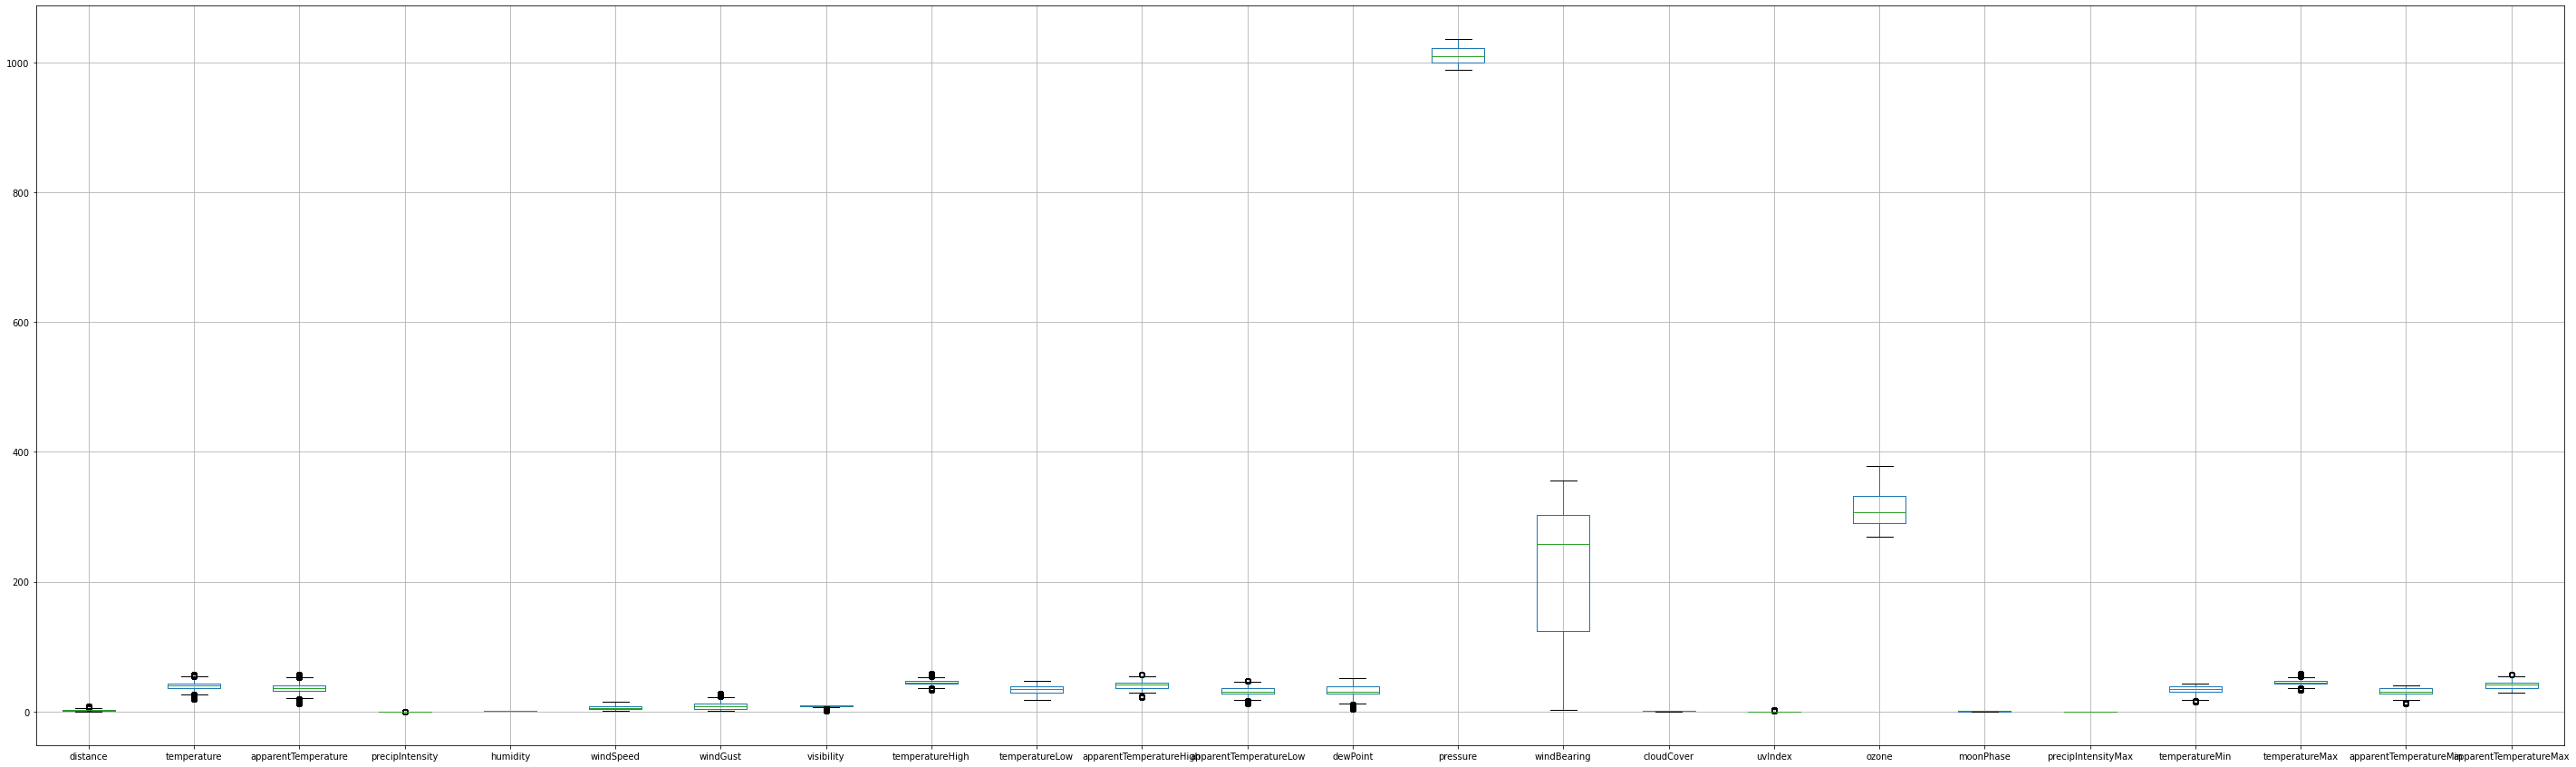

In [51]:
fig = plt.figure(figsize = (50,15))
data_outliers.boxplot()

<AxesSubplot:>

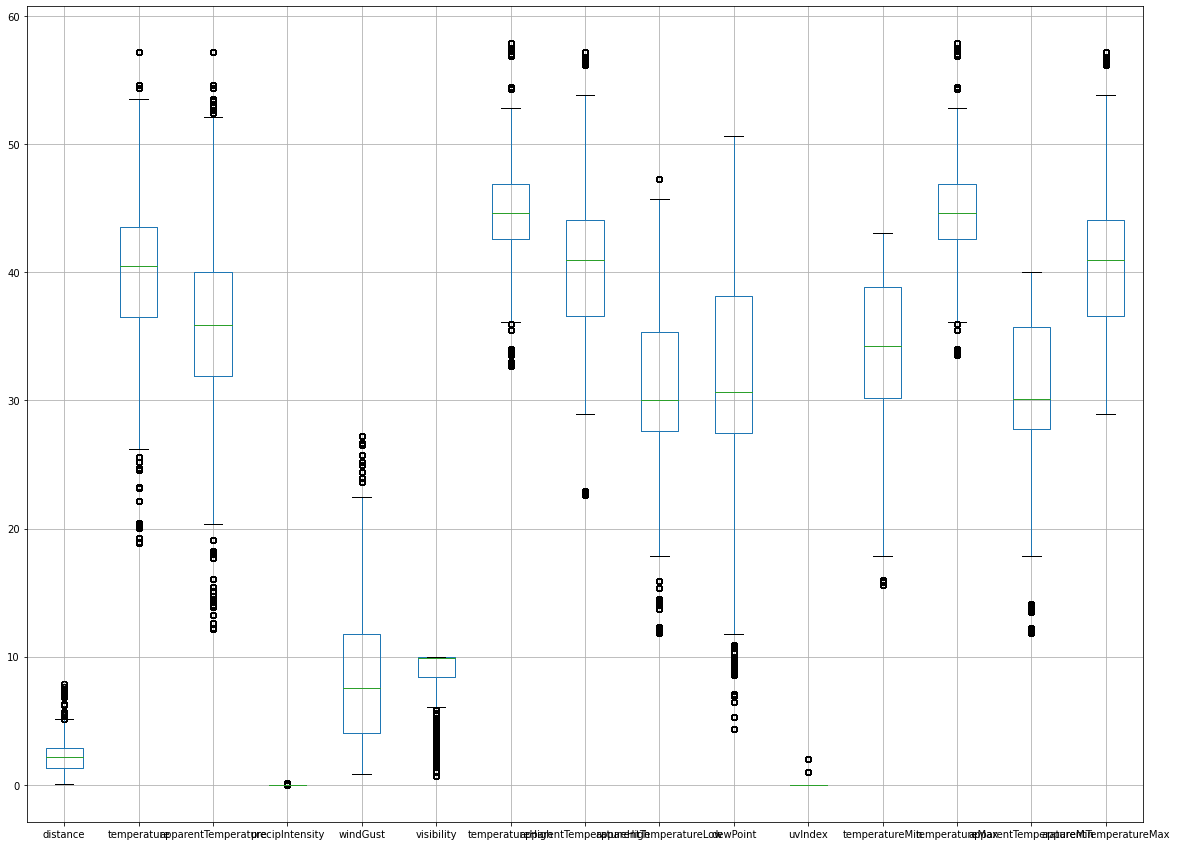

In [52]:
fig = plt.figure(figsize = (20,15))
data_outliers.iloc[:,[0,1,2,3,6,7,8,10,11,12,16,20,21,22,23]].boxplot()

<AxesSubplot:>

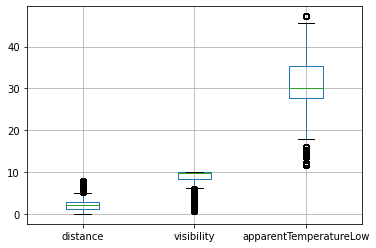

In [53]:
data_outliers.iloc[:,[0,7,11]].boxplot()

In [54]:
def outlier_bound(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    LB = Q1 - 1.5 * (Q3 - Q1)
    UB = Q3 + 1.5 * (Q3 - Q1)
    print(LB, "\n", UB)

In [55]:
outlier_bound(data_outliers.iloc[:,[0,1,2,3,6,7,8,10,11,12,16,20,21,22,23]])

distance                   -1.010
temperature                25.880
apparentTemperature        19.760
precipIntensity             0.000
windGust                   -7.460
visibility                  6.086
temperatureHigh            36.060
apparentTemperatureHigh    25.290
apparentTemperatureLow     16.120
dewPoint                   11.515
uvIndex                     0.000
temperatureMin             17.105
temperatureMax             36.060
apparentTemperatureMin     15.835
apparentTemperatureMax     25.290
dtype: float64 
 distance                    5.150
temperature                54.200
apparentTemperature        52.160
precipIntensity             0.000
windGust                   23.260
visibility                 12.342
temperatureHigh            53.420
apparentTemperatureHigh    55.370
apparentTemperatureLow     46.840
dewPoint                   54.115
uvIndex                     0.000
temperatureMin             51.945
temperatureMax             53.420
apparentTemperatureMin     47.6

In [56]:
data6[(data6["distance"] > 5.15) & (data6["visibility"] < 6.086) & (data6["apparentTemperatureLow"] < 16.12)].index

Int64Index([ 2095,  2608,  2935,  2946,  3333,  3544,  3762,  3882,  4125,
             4147,
            ...
            42019, 42020, 42021, 43165, 43166, 48186, 50309, 50310, 50311,
            50312],
           dtype='int64', length=110)

In [57]:
data6[(data6["distance"] > 5.15) & (data6["windGust"] > 23.26) & (data6["visibility"] < 6.086) & (data6["dewPoint"] < 11.515)
      & (data6["temperatureMin"] < 17.105) & (data6["apparentTemperatureMin"] < 15.835)
      & (data6["apparentTemperatureMax"] > 55.37)].index

Int64Index([], dtype='int64')

In [60]:
data6[(data6["distance"] > 5.15) & (data6["visibility"] > 6.086) & (data6["visibility"] < 6.086)
      & (data6["dewPoint"] < 11.515)].index

Int64Index([], dtype='int64')

In [63]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data_outliers)

In [71]:
data6["anomaly"] = pd.Series(preds)
data7 = data6[data6["anomaly"] != -1].drop("anomaly", axis = 1).reset_index().drop("index", axis = 1)

### Handle Duplicate Data

In [73]:
data7.duplicated().sum()

582

In [74]:
data8 = data7.drop_duplicates().reset_index().drop("index", axis = 1)

In [77]:
data8_1 = data8.drop("price", axis = 1)
data8_2 = data8.iloc[:,29]
data9 = pd.concat([data8_1, data8_2], axis = 1)

### Statistical Analysis

<AxesSubplot:>

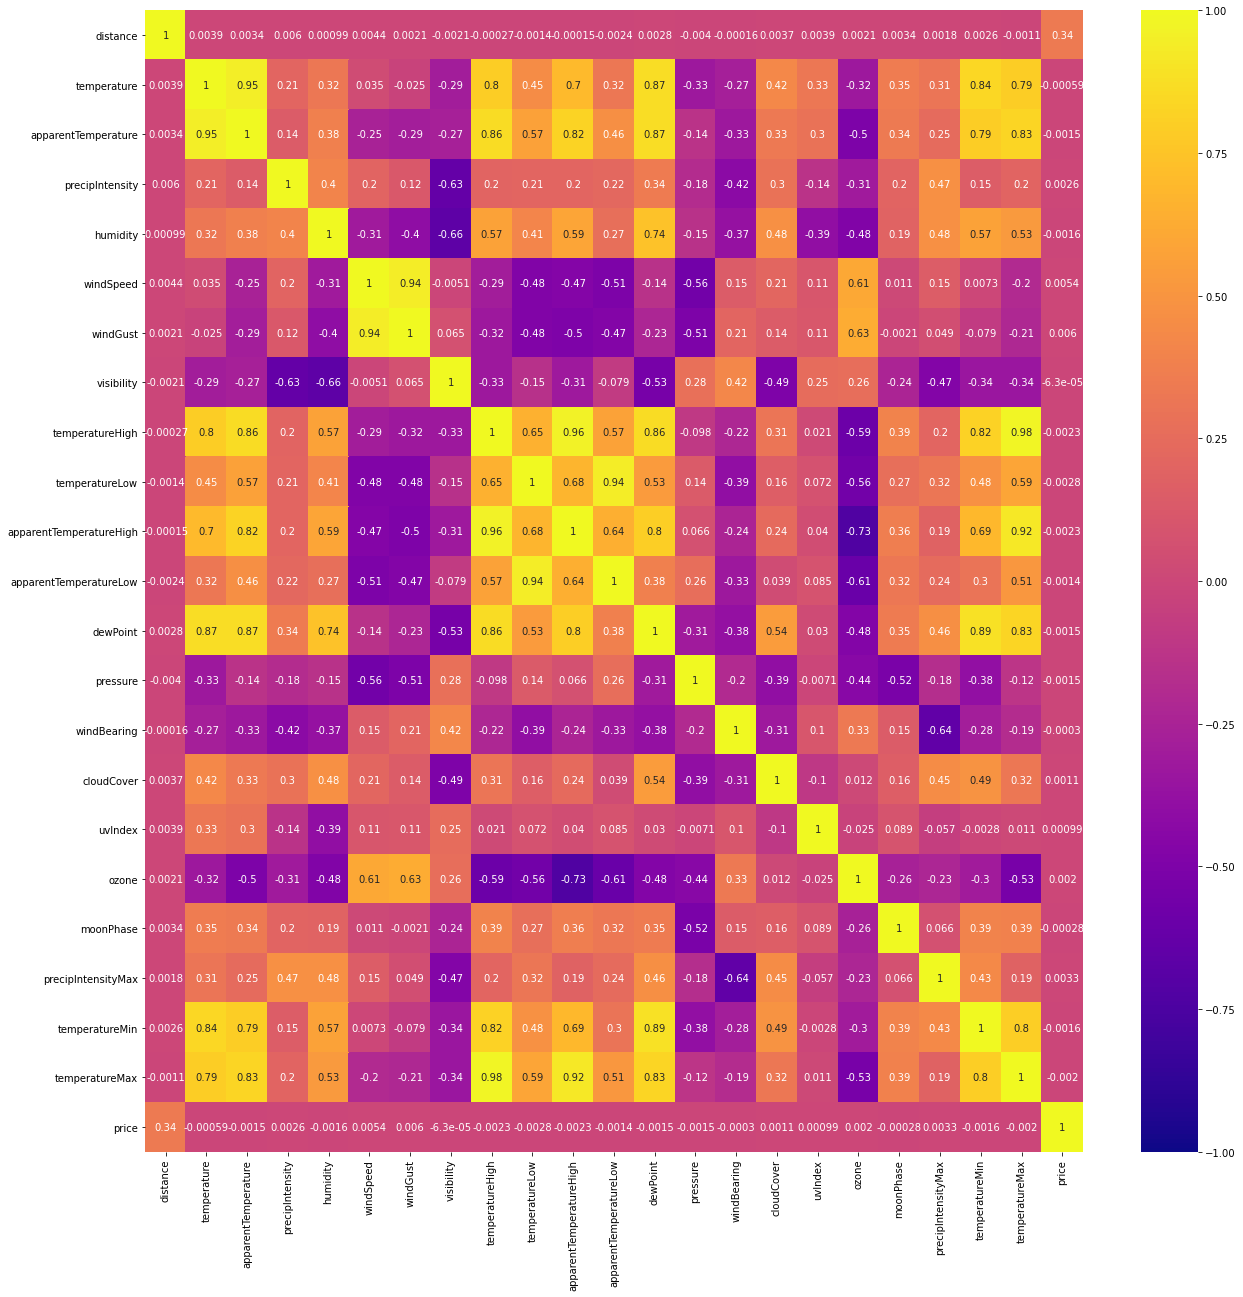

In [82]:
fig = plt.figure(figsize = (21,21))
datafc = data9.iloc[:,[i for i in range(4,27) if i != 8]]
datafc1 = data9.iloc[:,-1]
datafc_t = pd.concat([datafc, datafc1], axis = 1)
sns.heatmap(datafc_t.corr(), vmin = -1, vmax = 1, annot = True, cmap = "plasma")  #cmap = "BuPu"

In [83]:
data9.columns

Index(['minute', 'hour', 'day', 'month', 'distance', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax', 'atmaxt_month',
       'atmaxt_day', 'atmaxt_hour', 'atmaxt_minute', 'atmint_month',
       'atmint_day', 'atmint_hour', 'atmint_minute', 'tmaxt_month',
       'tmaxt_day', 'tmaxt_hour', 'tmaxt_minute', 'tmint_month', 'tmint_day',
       'tmint_hour', 'tmint_minute', 'uvit_month', 'uvit_day', 'uvit_hour',
       'uvit_minute', 'sst_month', 'sst_day', 'sst_hour', 'sst_minute',
       'srt_month', 'srt_day', 'srt_hour', 'srt_minute', 'atlt_month',
       'atlt_day', 'atlt_hour', 'atlt_mi

In [89]:
from scipy import stats
rho, pvalue = stats.spearmanr(data9.iloc[:,[-18,-17,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2]], data9.iloc[:,-1])

<AxesSubplot:>

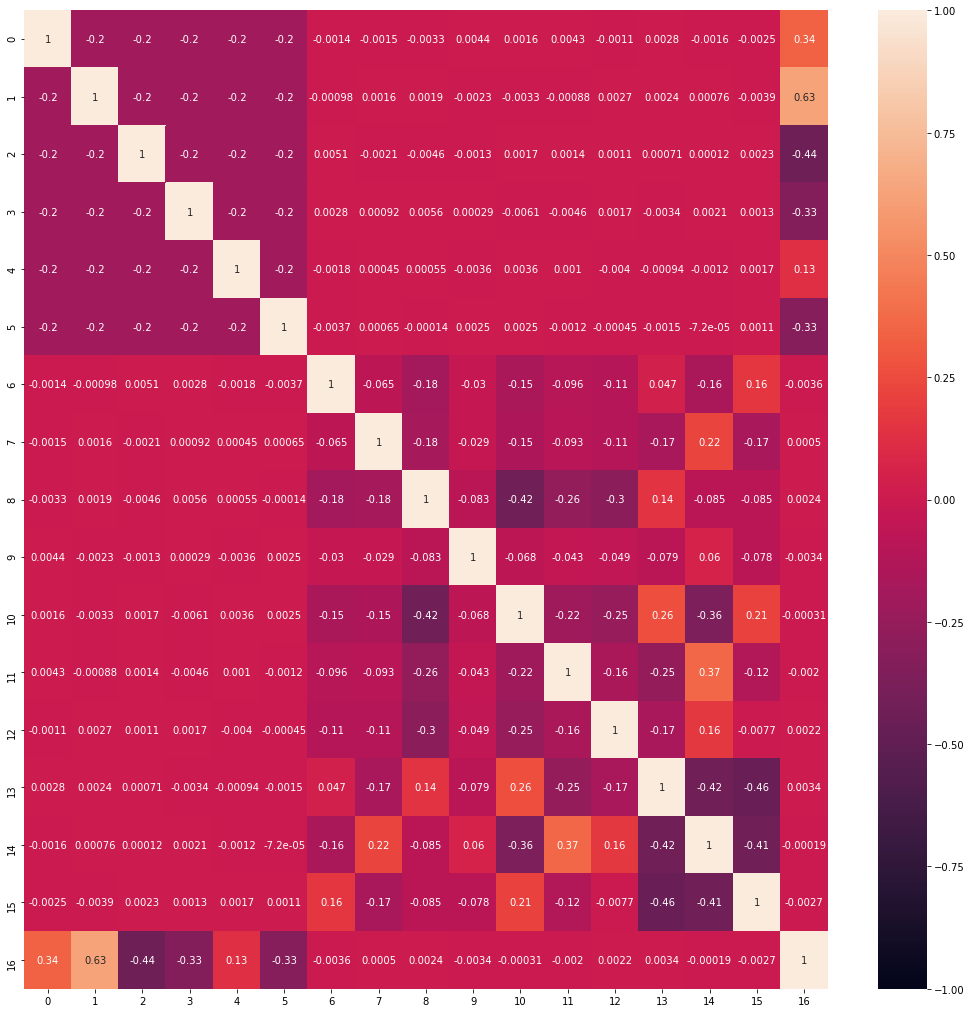

In [91]:
fig = plt.figure(figsize = (18,18))
sns.heatmap(rho, annot = True, vmin = -1, vmax = 1)

In [92]:
data9.iloc[:,[i for i in range(4,15) if i != 8]].describe().drop(["count", "25%", "75%"], axis = 0)

,distance,temperature,apparentTemperature,precipIntensity,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow
mean,2.201048,39.092105,35.241186,0.006658,0.747715,6.365633,8.951914,8.304290,44.815943,33.672734
std,1.185006,7.486789,8.887432,0.019295,0.146608,3.436850,6.078965,2.738676,6.257922,6.498504
min,0.020000,18.910000,12.130000,0.000000,0.400000,1.030000,1.050000,0.717000,32.680000,19.630000
50%,2.170000,40.770000,35.840000,0.000000,0.750000,5.890000,7.010000,9.868000,44.660000,33.850000
max,7.860000,57.220000,57.220000,0.092300,0.960000,14.950000,27.250000,10.000000,57.870000,46.600000


In [93]:
data9.iloc[:,[i for i in range(15,27) if i != 8]].describe().drop(["count", "25%", "75%"], axis = 0)

,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax
mean,41.269028,29.668217,31.362695,1010.085036,226.391145,0.694679,0.476508,313.762396,0.577062,0.037449,33.261621,45.178708
std,8.132731,8.279439,10.061491,13.863373,100.053301,0.356443,0.581078,28.504231,0.242376,0.055076,6.438235,5.696521
min,22.620000,11.810000,6.460000,988.090000,13.000000,0.000000,0.000000,269.400000,0.210000,0.000000,17.850000,33.510000
50%,40.690000,29.880000,29.570000,1010.580000,261.000000,0.890000,0.000000,309.100000,0.680000,0.000700,34.240000,44.660000
max,57.200000,47.250000,49.270000,1035.550000,356.000000,1.000000,2.000000,378.700000,0.930000,0.143300,43.100000,57.870000


In [94]:
# Harmonic Mean of the  column in dataframe
hmean = stats.hmean(data8.iloc[:,[i for i in range(5,27) if i != 8]],axis=0)
hmean_df = pd.DataFrame(hmean.reshape(1,-1), columns = data9.iloc[:,[i for i in range(5,27) if i != 8]].columns)
hmean_df

,temperature,apparentTemperature,precipIntensity,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,...,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax
0,37.343298,32.188688,0.0,0.715961,4.396883,5.63627,6.25268,43.903924,32.268144,39.450143,...,26.024677,1009.894927,132.399999,0.0,0.0,311.234379,0.45086,0.0,31.681015,44.462909


In [95]:
kurtosis = pd.DataFrame(data9.iloc[:,[i for i in range(5,27) if i != 8]].kurtosis(), columns = ["kurtosis"])
skew = pd.DataFrame(data9.iloc[:,[i for i in range(5,27) if i != 8]].skew(), columns = ["skew"])
dist_st = pd.concat([kurtosis, skew], axis = 1)
dist_st

,kurtosis,skew
temperature,0.332026,-0.490141
apparentTemperature,0.578180,-0.340122
precipIntensity,8.746393,3.158192
humidity,-1.093646,-0.286551
windSpeed,-0.833456,0.455390
windGust,0.452778,1.077045
visibility,0.284481,-1.401091
temperatureHigh,0.011188,-0.015424
temperatureLow,-0.503683,-0.268129
apparentTemperatureHigh,0.153093,-0.112496


Text(0.5, 1.0, 'windGust')

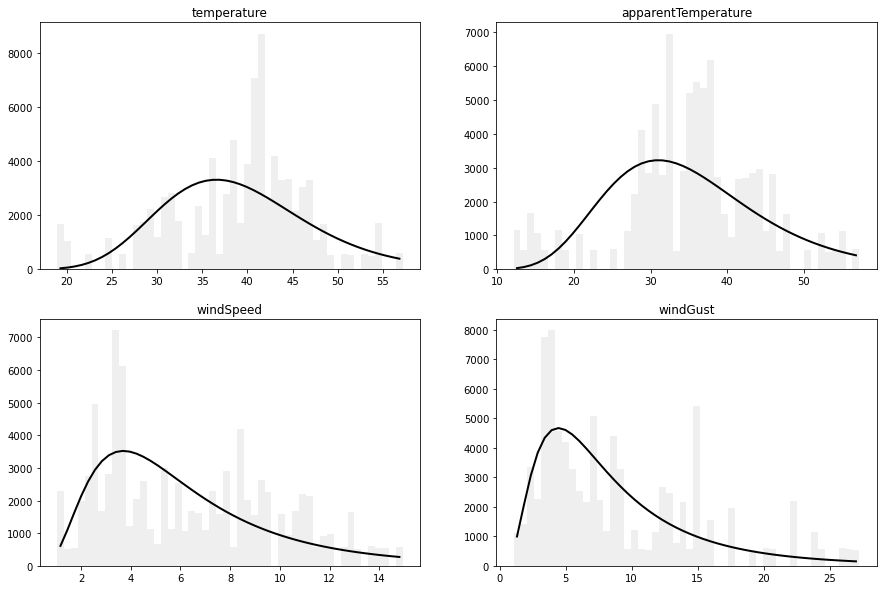

In [96]:
fig = plt.figure(figsize = (15,10))

#temperature
plt.subplot(2,2,1)

samples = data9.iloc[:,5]
shape, loc, scale= stats.lognorm.fit(samples, floc=0)
num_bins = 50
clr = "#EFEFEF"
counts,edges,patches = plt.hist(samples, bins = num_bins, color = clr)
centers = 0.5 * (edges[:-1] + edges[1:])
cdf = stats.lognorm.cdf(edges, shape, loc = loc, scale = scale)
prob = np.diff(cdf)
plt.plot(centers, samples.size * prob, 'k-', linewidth=2)
plt.title("temperature")


#apparentTemperature
plt.subplot(2,2,2)

samples = data9.iloc[:,6]
shape,loc,scale = stats.lognorm.fit(samples, floc = 0)
num_bins = 50
clr = "#EFEFEF"
counts,edges,patches = plt.hist(samples,bins = num_bins, color = clr)
centers = 0.5 * (edges[:-1] + edges[1:])
cdf = stats.lognorm.cdf(edges, shape,loc = loc, scale = scale)
prob = np.diff(cdf)
plt.plot(centers, samples.size * prob,'k-', linewidth = 2)
plt.title("apparentTemperature")


#windSpeed
plt.subplot(2,2,3)

samples = data9.iloc[:,10]
shape,loc,scale = stats.lognorm.fit(samples, floc = 0)
num_bins = 50
clr="#EFEFEF"
counts,edges,patches = plt.hist(samples,bins = num_bins, color = clr)
centers = 0.5 * (edges[:-1] + edges[1:])
cdf = stats.lognorm.cdf(edges,shape, loc = loc,scale = scale)
prob = np.diff(cdf)
plt.plot(centers, samples.size * prob, 'k-', linewidth = 2)
plt.title("windSpeed")


#windGust
plt.subplot(2,2,4)

samples = data9.iloc[:,11]
shape,loc,scale = stats.lognorm.fit(samples, floc = 0)
num_bins = 50
clr = "#EFEFEF"
counts,edges,patches = plt.hist(samples, bins = num_bins, color = clr)
centers = 0.5 * (edges[:-1] + edges[1:])
cdf = stats.lognorm.cdf(edges,shape,loc = loc, scale = scale)
prob = np.diff(cdf)
plt.plot(centers, samples.size * prob, 'k-', linewidth = 2)
plt.title("windGust")

In [97]:
f_oneway(data9["temperatureMean"], data9["distance"])

F_onewayResult(statistic=3445088.2879465516, pvalue=0.0)

In [98]:
mod = ols('temperatureMean ~ distance', data = data9).fit()

# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table')
print('----------------------')
print(aov_table)
print()

ANOVA table
----------------------
                sum_sq       df         F    PR(>F)
distance  2.343178e+00      1.0  0.070814  0.790156
Residual  2.869157e+06  86710.0       NaN       NaN



# Feature Selection

### method2 (PFA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

In [ ]:
pfa = PFA(n_features=15)
pfa.fit(x)

# To get the transformed matrix
x = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_

### method3 (HillClimbSearch)

In [ ]:
hc = HillClimbSearch(x, scoring_method = BicScore(x))
best_model = hc.estimate()
print(best_model.edges())

In [71]:
x.columns

Index(['distance', 'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'temperatureMean', 'apparentTemperatureMean'],
      dtype='object')

### method4 (Eliminate low variance features)

In [ ]:
## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

### method5 (MDP)

In [ ]:
def generate_MDP_input2(original_data, features):

    students_variables = ['student', 'priorTutorAction', 'reward']

    # generate distinct state based on feature
    #original_data['state'] = original_data[features].apply(lambda x: ':'.join(str(v) for v in x), axis=1)
    original_data['state'] = original_data[features].apply(tuple, axis=1)
    students_variables = students_variables + ['state']
    data = original_data[students_variables]

    # quantify actions
    distinct_acts = list(data['priorTutorAction'].unique())
    Nx = len(distinct_acts)
    i = 0
    for act in distinct_acts:
        data.loc[data['priorTutorAction'] == act, 'priorTutorAction'] = i
        i += 1

    # initialize state transition table, expected reward table, starting state table
    # distinct_states didn't contain terminal state
    student_list = list(data['student'].unique())
    distinct_states = list()
    for student in student_list:
        student_data = data.loc[data['student'] == student,]
        # don't consider last row
        temp_states = list(student_data['state'])[0:-1]
        distinct_states = distinct_states + temp_states
    distinct_states = list(set(distinct_states))

    Ns = len(distinct_states)

    # we include terminal state
    start_states = np.zeros(Ns + 1)
    A = np.zeros((Nx, Ns+1, Ns+1))
    expectR = np.zeros((Nx, Ns+1, Ns+1))

    # update table values episode by episode
    # each episode is a student data set
    for student in student_list:
        student_data = data.loc[data['student'] == student,]
        row_list = student_data.index.tolist()

        # count the number of start state
        start_states[distinct_states.index(student_data.loc[row_list[0], 'state'])] += 1

        # count the number of transition among states without terminal state
        for i in range(1, (len(row_list)-1)):
            state1 = distinct_states.index(student_data.loc[row_list[i - 1], 'state'])
            state2 = distinct_states.index(student_data.loc[row_list[i], 'state'])
            act = student_data.loc[row_list[i], 'priorTutorAction']

            # count the state transition
            A[act, state1, state2] += 1
            expectR[act, state1, state2] += float(student_data.loc[row_list[i], 'reward'])

        # count the number of transition from state to terminal
        state1 = distinct_states.index(student_data.loc[row_list[-2], 'state'])
        act = student_data.loc[row_list[-1], 'priorTutorAction']
        A[act, state1, Ns] += 1
        expectR[act, state1, Ns] += float(student_data.loc[row_list[-1], 'reward'])

    # normalization
    start_states = start_states / np.sum(start_states)

    for act in range(Nx):
        A[act, Ns, Ns] = 1
        # generate expected reward
        with np.errstate(divide='ignore', invalid='ignore'):
            expectR[act] = np.divide(expectR[act], A[act])
            expectR[np.isnan(expectR)] = 0

        # each column will sum to 1 for each row, obtain the state transition table
        for l in np.where(np.sum(A[act], axis=1) == 0)[0]:
            A[act][l][l] = 1
        A[act] = np.divide(A[act].transpose(), np.sum(A[act], axis=1))
        A[act] = A[act].transpose()

    return [start_states, A, expectR, distinct_acts, distinct_states]


def calcuate_ECR(start_states, expectV):
    ECR_value = start_states.dot(np.array(expectV))
    return ECR_value


def output_policy(distinct_acts, distinct_states, vi):
    Ns = len(distinct_states)
    print('Policy: ')
    print('state -> action, value-function')
    countwe = 0
    countps = 0
    for s in range(Ns):
        if (str(distinct_acts[vi.policy[s]]) == 'WE'):
            countwe += 1
        elif (str(distinct_acts[vi.policy[s]]) == 'PS'):
            countps += 1
        print(str(distinct_states[s]) + " -> " + str(distinct_acts[vi.policy[s]]) + ", " + str(vi.V[s]))
    print countwe
    print countps
    print Ns

def checkFeatures(original_data):
    cols = list(original_data.columns)

    max_ecr = 0.0
    max_selected_features = []
    for i in range(7, len(cols)):
        if (original_data[cols[i]].dtype == 'int64' and cols[i] != 'cumul_Interaction'):# and len(set(original_data[cols[i]])) <= 10):
            selected_features = ['cumul_Interaction', cols[i]]
            #print selected_features
            #selected_features = ['Level', 'probDiff']
            ecr = induce_policy_MDP2(original_data, selected_features)
            if (ecr > max_ecr):
                max_ecr = ecr
                max_selected_features = selected_features
    print max_selected_features
    return max_ecr


def induce_policy_MDP2(original_data, selected_features):

    print(selected_features)
    [start_states, A, expectR, distinct_acts, distinct_states] = generate_MDP_input2(original_data, selected_features)

    # apply Value Iteration to run the MDP
    vi = mdptoolbox.mdp.ValueIteration(A, expectR, 0.9)
    vi.run()

    # output policy
    output_policy(distinct_acts, distinct_states, vi)

    # evaluate policy using ECR
    ECR_value = calcuate_ECR(start_states, vi.V)
    print('ECR value: ' + str(ECR_value))
    return ECR_value

if __name__ == "__main__":

    original_data = pandas.read_csv('data/MDP_Original_data2.csv')
    famd_data = pandas.read_csv('data/famd/FAMD_features.csv')
    x = pandas.cut(famd_data['Dim.6'], 2, labels=False)
    two_features = original_data[['Level', 'cumul_Interaction']]

    nn_data = pandas.read_csv('data/nn/nn_scrap/nn_discreitized_data.csv')
    selected_features = ['Level', 'cumul_Interaction', 'Dim.6']
    total_data = pandas.concat([original_data.iloc[:,0:6], two_features, x], axis=1)
    #selected_features = ['symbolicRepresentationCount']
    ECR_value = induce_policy_MDP2(total_data, selected_features)
    #print checkFeatures(original_data)

### method6 (NDFS)

In [ ]:
import scipy.io
from skfeature.function.sparse_learning_based import NDFS
from skfeature.utility import construct_W
from skfeature.utility.sparse_learning import feature_ranking
from skfeature.utility import unsupervised_evaluation


def main():
    # load data
    mat = scipy.io.loadmat('../data/COIL20.mat')
    X = mat['X']    # data
    X = X.astype(float)
    y = mat['Y']    # label
    y = y[:, 0]

    # construct affinity matrix
    kwargs = {"metric": "euclidean", "neighborMode": "knn", "weightMode": "heatKernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs)

    # obtain the feature weight matrix
    Weight = NDFS.ndfs(X, W=W, n_clusters=20)

    # sort the feature scores in an ascending order according to the feature scores
    idx = feature_ranking(Weight)

    # perform evaluation on clustering task
    num_fea = 100    # number of selected features
    num_cluster = 20    # number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the dataset on the selected features
    selected_features = X[:, idx[0:num_fea]]

    # perform kmeans clustering based on the selected features and repeats 20 times
    nmi_total = 0
    acc_total = 0
    for i in range(0, 20):
        nmi, acc = unsupervised_evaluation.evaluation(X_selected=selected_features, n_clusters=num_cluster, y=y)
        nmi_total += nmi
        acc_total += acc

    # output the average NMI and average ACC
    print 'NMI:', float(nmi_total)/20
    print 'ACC:', float(acc_total)/20

### method7 (SPEC)

In [ ]:
import scipy.io
from skfeature.function.similarity_based import SPEC
from skfeature.utility import unsupervised_evaluation


def main():
    # load data
    mat = scipy.io.loadmat('../data/COIL20.mat')
    X = mat['X']    # data
    X = X.astype(float)
    y = mat['Y']    # label
    y = y[:, 0]

    # specify the second ranking function which uses all except the 1st eigenvalue
    kwargs = {'style': 0}

    # obtain the scores of features
    score = SPEC.spec(X, **kwargs)

    # sort the feature scores in an descending order according to the feature scores
    idx = SPEC.feature_ranking(score, **kwargs)

    # perform evaluation on clustering task
    num_fea = 100    # number of selected features
    num_cluster = 20    # number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the dataset on the selected features
    selected_features = X[:, idx[0:num_fea]]

    # perform kmeans clustering based on the selected features and repeats 20 times
    nmi_total = 0
    acc_total = 0
    for i in range(0, 20):
        nmi, acc = unsupervised_evaluation.evaluation(X_selected=selected_features, n_clusters=num_cluster, y=y)
        nmi_total += nmi
        acc_total += acc

    # output the average NMI and average ACC
    print 'NMI:', float(nmi_total)/20
    print 'ACC:', float(acc_total)/20

### method8 (UDFS)

In [ ]:
import scipy.io
from skfeature.function.sparse_learning_based import UDFS
from skfeature.utility import unsupervised_evaluation
from skfeature.utility.sparse_learning import feature_ranking


def main():
    # load data
    mat = scipy.io.loadmat('../data/COIL20.mat')
    X = mat['X']    # data
    X = X.astype(float)
    y = mat['Y']    # label
    y = y[:, 0]

    # perform evaluation on clustering task
    num_fea = 100    # number of selected features
    num_cluster = 20    # number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the feature weight matrix
    Weight = UDFS.udfs(X, gamma=0.1, n_clusters=num_cluster)

    # sort the feature scores in an ascending order according to the feature scores
    idx = feature_ranking(Weight)

    # obtain the dataset on the selected features
    selected_features = X[:, idx[0:num_fea]]

    # perform kmeans clustering based on the selected features and repeats 20 times
    nmi_total = 0
    acc_total = 0
    for i in range(0, 20):
        nmi, acc = unsupervised_evaluation.evaluation(X_selected=selected_features, n_clusters=num_cluster, y=y)
        nmi_total += nmi
        acc_total += acc

    # output the average NMI and average ACC
    print 'NMI:', float(nmi_total)/20
    print 'ACC:', float(acc_total)/20

### method9 (Lap-Score)

In [ ]:
import scipy.io
from skfeature.function.similarity_based import lap_score
from skfeature.utility import construct_W
from skfeature.utility import unsupervised_evaluation


def main():
    # load data
    mat = scipy.io.loadmat('../data/COIL20.mat')
    X = mat['X']    # data
    X = X.astype(float)
    y = mat['Y']    # label
    y = y[:, 0]

    # construct affinity matrix
    kwargs_W = {"metric": "euclidean", "neighbor_mode": "knn", "weight_mode": "heat_kernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs_W)

    # obtain the scores of features
    score = lap_score.lap_score(X, W=W)

    # sort the feature scores in an ascending order according to the feature scores
    idx = lap_score.feature_ranking(score)

    # perform evaluation on clustering task
    num_fea = 100    # number of selected features
    num_cluster = 20    # number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the dataset on the selected features
    selected_features = X[:, idx[0:num_fea]]

    # perform kmeans clustering based on the selected features and repeats 20 times
    nmi_total = 0
    acc_total = 0
    for i in range(0, 20):
        nmi, acc = unsupervised_evaluation.evaluation(X_selected=selected_features, n_clusters=num_cluster, y=y)
        nmi_total += nmi
        acc_total += acc

    # output the average NMI and average ACC
    print 'NMI:', float(nmi_total)/20
    print 'ACC:', float(acc_total)/20

### method10 (MCFS)

In [ ]:
import scipy.io
from skfeature.function.sparse_learning_based import MCFS
from skfeature.utility import construct_W
from skfeature.utility import unsupervised_evaluation


def main():
    # load data
    mat = scipy.io.loadmat('../data/COIL20.mat')
    X = mat['X']    # data
    X = X.astype(float)
    y = mat['Y']    # label
    y = y[:, 0]

    # construct affinity matrix
    kwargs = {"metric": "euclidean", "neighborMode": "knn", "weightMode": "heatKernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs)

    num_fea = 100    # specify the number of selected features
    num_cluster = 20    # specify the number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the feature weight matrix
    Weight = MCFS.mcfs(X, n_selected_features=num_fea, W=W, n_clusters=20)

    # sort the feature scores in an ascending order according to the feature scores
    idx = MCFS.feature_ranking(Weight)

    # obtain the dataset on the selected features
    selected_features = X[:, idx[0:num_fea]]

    # perform kmeans clustering based on the selected features and repeats 20 times
    nmi_total = 0
    acc_total = 0
    for i in range(0, 20):
        nmi, acc = unsupervised_evaluation.evaluation(X_selected=selected_features, n_clusters=num_cluster, y=y)
        nmi_total += nmi
        acc_total += acc

    # output the average NMI and average ACC
    print 'NMI:', float(nmi_total)/20
    print 'ACC:', float(acc_total)/20

# Basic Dynamic Pricing

In [ ]:
import autograd.numpy as np
from autograd import value_and_grad
from scipy.stats import gamma

def model(w,x):
    return np.dot(x[0].T,w)

def least_squares(w,x,y):    
    cost = np.sum((model(w,x) - y)**2)
    return cost

def gradient_descent(g,alpha,max_its,w,x,y):
    gradient = value_and_grad(g)

    weight_history = []      
    cost_history = []

    for k in range(1,max_its+1):
        cost_eval,grad_eval = gradient(w,x,y)
        
        weight_history.append(w)
        cost_history.append(cost_eval)

        w = w - alpha*grad_eval

    weight_history.append(w)
    cost_history.append(g(w,x,y))
    cost_history = np.asarray(cost_history)/x.shape[2]
    
    return weight_history,cost_history

def generate_sample(sample_size, gen_probs, weights):
    sample = np.random.rand(sample_size,len(gen_probs))
    for i in range(sample.shape[1]):
        sample[:,i] = [1 if x < gen_probs[i] else 0 for x in sample[:,i]]
    sample = np.vstack((np.ones((1,sample_size)),sample.T)).T
    value = []
    for i in range(sample_size):
        a = np.dot(weights,sample[i])
        val = gamma.ppf(np.random.uniform(),a,scale = 1/np.sqrt(a))
        value.append(np.round(val,2))
    return sample, value

def demand_curve(axis, value):
    demand = []
    sample_size = len(value)
    for price in axis:
        demand.append(sum(1 if x>=price else 0 for x in value)/sample_size)
    return demand

logistic_demand = lambda a,x0,x: 1/(1+np.exp(np.abs(a)*(x-x0)))

def APP_s(axis, value, c):
    app_s = []
    sample_size = len(value)
    demand = demand_curve(axis, value)
    for i in range(len(axis)):
        app_s.append(max(axis[i]-c,0)*demand[i])
    return app_s

def APP_d(w,x,y,c,d):
    est = d*model(w,x)
    ind = list(range(len(est)))
    rev = sum(max(est[i],c) if y[0][i] >= max(est[i],c) else 0 for i in ind)
    return rev/x.shape[2]

# Static Price Profit Maximization

In [ ]:
app_s_train = dp.APP_s(axis_2, y_train, c)
index = np.argmax(app_s_train)
app_s_test = dp.APP_s(axis_2, y_test, c)
app_s_star = app_s_test[index]

plt.figure()
plt.plot(axis_2, app_s_train)
plt.xlabel('Price of Good')
plt.ylabel('APP')
plt.title('Static Price Profit Maximization')
plt.show()
print('Optimized Static APP: {:.2f}'.format(app_s_star))
print('Optimized Price:', axis_2[index])

# Dynamic Price Profit Maximization

In [ ]:
x_train = x_train[np.newaxis, :]
y_train = y_train[np.newaxis, :]
x_test = x_test[np.newaxis, :]
y_test = y_test[np.newaxis, :]
wh, ch = dp.gradient_descent(dp.least_squares,rate,max_it,np.random.rand(5),x_train,y_train)

index = np.argmin(ch)
w_star = wh[index]
cost_train = ch[index]
cost_test = dp.least_squares(w_star,x_test,y_test)/x_test.shape[2]
app_d_1 = dp.APP_d(w_star,x_test,y_test,c,1)

In [ ]:
axis = range(max_it+1)
plt.figure()
plt.plot(axis,ch)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Controller Training')
plt.show()


print('Optimized Weights: ', np.round(w_star,1))
print('Optimized Cost: {:.2f}'.format(cost_train))
print('Test Cost: {:.2f}'.format(cost_test))
print('Dynamic APP: {:.2f}'.format(app_d_1))

In [ ]:
axis_d = np.linspace(0.7,1,16)
app_d = []
for d in axis_d:
    app_d.append(dp.APP_d(w_star,x_test,y_test,c,d))

d_star = axis_d[np.argmax(app_d)]
app_d_star = dp.APP_d(w_star,x_train,y_train,c,d_star)

plt.figure()
plt.plot(axis_d,app_d)
plt.xlabel('Discount')
plt.ylabel('APP')
plt.title('Dynamic Price Profit Maximization')
plt.show()
print('Optimized Discount: {:.2f}'.format(d_star))
print('Test Dynamic APP: {:.2f}'.format(app_d_star))

# RL and DRL Algorithms

### Q-Learning

In [ ]:

import scipy
import scipy.stats
import numpy as np
import random
import pylab
from keras.layers import Dense
from keras.models import Sequential
from collections import defaultdict

MINPRICE = 3000
MAXPRICE = 4600
INITIALPRICE = 3800



class Env:
    def __init__(self):
        self.action_space = ['u', 'l', 'c', 'r', 'd']
        self.n_actions = len(self.action_space)  # 5 actions
        self.marketPrice = INITIALPRICE            # InitialPrice
        self.p_array = np.random.normal(self.marketPrice, 190, 500) #Passenger
        self.p_count = len(self.p_array)                              
        self.d_array = np.random.normal(self.marketPrice, 190, 500) #Driver
        self.d_count = len(self.d_array)                                

        

    def acceptP(self, offer, preferred):
        num = 0
        for i in preferred:
            x = (-offer + i) / 1600 
        
            if np.random.rand() <= scipy.stats.norm(0, 1).cdf(x):
                num += 1
        return num
        

    def acceptD(self, offer, preferred):
        num = 0
        for i in preferred:
            x = (offer - i) / 1600

            if np.random.rand() <= scipy.stats.norm(0, 1).cdf(x):
                num += 1
        return num
        
        
    def step(self, action, count):
        
        if   action == 0:   # up : price-=80
            count=0
            self.marketPrice-=80
            
        elif action == 1:   # left : price-=20
            count=0
            self.marketPrice-=20
            
        elif action == 2:   # center : Nothing happen
            count+=1
            
        elif action == 3:   # right : price+=20
            count=0
            self.marketPrice+=20

        elif action == 4:   # down : price+=80
            count=0
            self.marketPrice+=80


        next_state = self.marketPrice
        reward = 0


        p_ok = self.acceptP(next_state, self.p_array)
        d_ok = self.acceptD(next_state, self.d_array)
        match = min([p_ok, d_ok])
        reward = match * (next_state/1000)
        

        if next_state < MINPRICE or next_state > MAXPRICE:
            reward = -100
        

        done = False
        if count==10:
            done = True
        
        
        return next_state, reward, done
        
            
    def reset(self):
        self.marketPrice = INITIALPRICE
        self.p_array = np.random.normal(self.marketPrice, 190, 500) #Passenger
        self.d_array = np.random.normal(self.marketPrice, 190, 500) #Driver

        return self.marketPrice
        
#Agent
class priceActionModel:
    def __init__(self, actions):

        self.actions = actions
        self.learning_rate = 0.01
        self.discount_factor = 0.9
        self.epsilon = 1.  # exploration
        self.epsilon_decay = .9999
        self.epsilon_min = 0.01
        self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0, 0.0])
        

    def learn(self, state, action, reward, next_state):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            
        q_1 = self.q_table[state][action]

        q_2 = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (q_2 - q_1)
    

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:

            print(state, self.q_table[state])
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action
        
    #staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)
    
if __name__ == "__main__":
    
    env = Env()
    agent = priceActionModel(actions=list(range(env.n_actions)))  
    
    global_step = 0
    scores, episodes = [], []
    
    
    for episode in range(20):
        state = env.reset()
        count = 0
        
        for i in range(50000):
            global_step += 1


            action = agent.get_action(str(state))
            

            next_state, reward, done = env.step(action, count)


            agent.learn(str(state), action, reward, str(next_state))
            state = next_state

           
            scores.append(state)

### Deep Q-Network (DQN)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras import backend as k
from collections import deque
import gym

In [ ]:
env = gym.make('Transport')

In [ ]:
# Set seed for reproducibility
seed_val = 456
np.random.seed(seed_val)
env.seed(seed_val)
random.seed(seed_val)

In [ ]:
states = env.observation_space.shape[0]

In [ ]:
actions = env.action_space.n


In [ ]:
state = env.reset()

In [ ]:
action = 0
new_state, reward, done, info = env.step(action)
print((new_state, reward, done, info))

In [ ]:
def random_actions(episodes):
    for episode in range(episodes):
        state = env.reset() # reset environment
        done = False # set done to False
        score = 0
        while not done:
            action = random.choice([0,1]) # Choose between 0 or 1
            new_state, reward, done, info = env.step(action) # perform the action
            score+=1
        print('Episode: {} Score: {}'.format(episode+1, score))

In [ ]:
# Discount in Bellman Equation
gamma = 0.95
# Epsilon
epsilon = 1.0
# Minimum Epsilon
epsilon_min = 0.01
# Decay multiplier for epsilon
epsilon_decay = 0.99
# Size of deque container
deque_len = 20000
# Average score needed over 100 epochs
target_score = 200
# Number of games
episodes = 2000
# Data points per episode used to train the agent
batch_size = 64
# Optimizer for training the agent
optimizer = 'adam'
# Loss for training the agent
loss = 'mse'

In [ ]:
def agent(states, actions):
    model = Sequential()
    model.add(Dense(16, input_dim=states))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(actions))
    model.add(Activation('linear'))
    return model

# print summary of the agent
print(agent(states, actions).summary())

In [ ]:
def agent_action(model, epsilon, state, actions):
    """Define action to be taken."""
    if np.random.rand() <= epsilon:
        act = random.randrange(actions)
    else:
        act = np.argmax(model.predict(state)[0])
    return act

In [ ]:
def memory(state, new_state, reward, done, action):
    """Function to store data points in the deque container."""
    training_data.append((state, new_state, reward, done, action))

In [ ]:
def train(target_score, batch_size, episodes,
          optimizer, loss, epsilon,
          gamma, epsilon_min, epsilon_decay, actions, render=False):
    """."""
    print('----Training----')
    k.clear_session()

    # define empty list to store the score at the end of each episode
    scores = []
    
    # load the agent
    model = agent(states, actions)
    
    # compile the agent with mean squared error loss
    model.compile(loss=loss, optimizer=optimizer)

    for episode in range(1, (episodes+1)):
        
        # reset environment at the end of each episode
        state = env.reset()
        
        # reshape state to shape 1*4
        state = state.reshape(1, states)
        
        # set done value to False
        done = False
        
        # counter to keep track of actions taken in each episode
        time_step = 0
        
        # play until done value changes to True
        while not done:
            if render:
                env.render()

            # call the agent_action function to decide on an action
            action = agent_action(model, epsilon, state, actions)
            
            # take the action
            new_state, reward, done, info = env.step(action)
            reward = reward if not done else -10
            
            # reshape new_state to shape 1*4
            new_state = new_state.reshape(1, states)
            
            # call memory function to store info in the deque container
            memory(state, new_state, reward, done, action)
            
            # set state to new state
            state = new_state
            
            # increment timestep
            time_step += 1

        # call the replay function to train the agent
        epsilon = replay(epsilon, gamma, epsilon_min, epsilon_decay, model,
                         training_data)
    return model

In [ ]:
model = train(target_score=target_score, batch_size=batch_size,
              episodes=episodes, optimizer=optimizer, loss=loss,
              epsilon=epsilon, gamma=gamma, epsilon_min=epsilon_min,
              epsilon_decay=epsilon_decay, actions=actions, render=False)

In [ ]:
def test(env, model, states, episodes=100, render=False):
    """Test the performance of the DQN agent."""
    scores_test = []
    for episode in range(1, (episodes+1)):
        state = env.reset()
        state = state.reshape(1, states)

        done = False
        time_step = 0

        while not done:
            if render:
                env.render()
            action = np.argmax(model.predict(state)[0])
            new_state, reward, done, info = env.step(action)
            new_state = new_state.reshape(1, states)
            state = new_state
            time_step += 1
        scores_test.append(time_step)
        if episode % 10 == 0:
            print('episode {}, score {} '.format(episode, time_step))
    print('Average score over 100 test games: {}'.format(np.mean(scores_test)))

    
test(env, model, states, render=False)

### Deep Deterministic Policy Gradients (DDPG)

In [ ]:
import gym
import numpy as np

from stable_baselines.ddpg.policies import MlpPolicy
from stable_baselines.common.evaluation import evaluate_policy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec
from stable_baselines import DDPG

In [ ]:
env = gym.make('Transport')

In [ ]:
n_actions = env.action_space.shape[-1]

In [ ]:
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

In [ ]:
agent = DDPG(MlpPolicy, env, verbose=1, param_noise=None, action_noise=action_noise)

In [ ]:
agent.learn(total_timesteps=25000)

In [ ]:
mean_reward, n_steps = evaluate_policy(agent, agent.get_env(),
n_eval_episodes=10)

### Proximal Policy Optimization (PPO)

In [ ]:
import torch as th
from torch import nn
from torch.optim import Adam, RMSprop

import numpy as np
from copy import deepcopy

from common.Agent import Agent
from common.Model import ActorNetwork, CriticNetwork
from common.utils import index_to_one_hot, to_tensor_var


class PPO(Agent):

    def __init__(self, env, state_dim, action_dim,
                 memory_capacity=10000, max_steps=None,
                 roll_out_n_steps=1, target_tau=1.,
                 target_update_steps=5, clip_param=0.2,
                 reward_gamma=0.99, reward_scale=1., done_penalty=None,
                 actor_hidden_size=32, critic_hidden_size=32,
                 actor_output_act=nn.functional.log_softmax, critic_loss="mse",
                 actor_lr=0.001, critic_lr=0.001,
                 optimizer_type="adam", entropy_reg=0.01,
                 max_grad_norm=0.5, batch_size=100, episodes_before_train=100,
                 epsilon_start=0.9, epsilon_end=0.01, epsilon_decay=200,
                 use_cuda=True):
        super(PPO, self).__init__(env, state_dim, action_dim,
                 memory_capacity, max_steps,
                 reward_gamma, reward_scale, done_penalty,
                 actor_hidden_size, critic_hidden_size,
                 actor_output_act, critic_loss,
                 actor_lr, critic_lr,
                 optimizer_type, entropy_reg,
                 max_grad_norm, batch_size, episodes_before_train,
                 epsilon_start, epsilon_end, epsilon_decay,
                 use_cuda)

        self.roll_out_n_steps = roll_out_n_steps
        self.target_tau = target_tau
        self.target_update_steps = target_update_steps
        self.clip_param = clip_param

        self.actor = ActorNetwork(self.state_dim, self.actor_hidden_size,
                                  self.action_dim, self.actor_output_act)
        self.critic = CriticNetwork(self.state_dim, self.action_dim, self.critic_hidden_size, 1)
        
        # to ensure target network and learning network has the same weights
        self.actor_target = deepcopy(self.actor)
        self.critic_target = deepcopy(self.critic)

        if self.optimizer_type == "adam":
            self.actor_optimizer = Adam(self.actor.parameters(), lr=self.actor_lr)
            self.critic_optimizer = Adam(self.critic.parameters(), lr=self.critic_lr)
        elif self.optimizer_type == "rmsprop":
            self.actor_optimizer = RMSprop(self.actor.parameters(), lr=self.actor_lr)
            self.critic_optimizer = RMSprop(self.critic.parameters(), lr=self.critic_lr)

        if self.use_cuda:
            self.actor.cuda()
            self.critic.cuda()
            self.actor_target.cuda()
            self.critic_target.cuda()

    # agent interact with the environment to collect experience
    def interact(self):
        super(PPO, self)._take_n_steps()

    # train on a roll out batch
    def train(self):
        if self.n_episodes <= self.episodes_before_train:
            pass

        batch = self.memory.sample(self.batch_size)
        states_var = to_tensor_var(batch.states, self.use_cuda).view(-1, self.state_dim)
        one_hot_actions = index_to_one_hot(batch.actions, self.action_dim)
        actions_var = to_tensor_var(one_hot_actions, self.use_cuda).view(-1, self.action_dim)
        rewards_var = to_tensor_var(batch.rewards, self.use_cuda).view(-1, 1)

        # update actor network
        self.actor_optimizer.zero_grad()
        values = self.critic_target(states_var, actions_var).detach()
        advantages = rewards_var - values
        
        # # normalizing advantages seems not working correctly here
        # advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-5)
        action_log_probs = self.actor(states_var)
        action_log_probs = th.sum(action_log_probs * actions_var, 1)
        old_action_log_probs = self.actor_target(states_var).detach()
        old_action_log_probs = th.sum(old_action_log_probs * actions_var, 1)
        ratio = th.exp(action_log_probs - old_action_log_probs)
        surr1 = ratio * advantages
        surr2 = th.clamp(ratio, 1.0 - self.clip_param, 1.0 + self.clip_param) * advantages
        # PPO's pessimistic surrogate (L^CLIP)
        actor_loss = -th.mean(th.min(surr1, surr2))
        actor_loss.backward()
        if self.max_grad_norm is not None:
            nn.utils.clip_grad_norm(self.actor.parameters(), self.max_grad_norm)
        self.actor_optimizer.step()

        # update critic network
        self.critic_optimizer.zero_grad()
        target_values = rewards_var
        values = self.critic(states_var, actions_var)
        if self.critic_loss == "huber":
            critic_loss = nn.functional.smooth_l1_loss(values, target_values)
        else:
            critic_loss = nn.MSELoss()(values, target_values)
        critic_loss.backward()
        if self.max_grad_norm is not None:
            nn.utils.clip_grad_norm(self.critic.parameters(), self.max_grad_norm)
        self.critic_optimizer.step()

        # update actor target network and critic target network
        if self.n_steps % self.target_update_steps == 0 and self.n_steps > 0:
            super(PPO, self)._soft_update_target(self.actor_target, self.actor)
            super(PPO, self)._soft_update_target(self.critic_target, self.critic)

    # predict softmax action based on state
    def _softmax_action(self, state):
        state_var = to_tensor_var([state], self.use_cuda)
        softmax_action_var = th.exp(self.actor(state_var))
        if self.use_cuda:
            softmax_action = softmax_action_var.data.cpu().numpy()[0]
        else:
            softmax_action = softmax_action_var.data.numpy()[0]
        return softmax_action

    # choose an action based on state with random noise added for exploration in training
    def exploration_action(self, state):
        softmax_action = self._softmax_action(state)
        epsilon = self.epsilon_end + (self.epsilon_start - self.epsilon_end) * \
                                  np.exp(-1. * self.n_steps / self.epsilon_decay)
        if np.random.rand() < epsilon:
            action = np.random.choice(self.action_dim)
        else:
            action = np.argmax(softmax_action)
        return action

    # choose an action based on state for execution
    def action(self, state):
        softmax_action = self._softmax_action(state)
        action = np.argmax(softmax_action)
        return action

    # evaluate value for a state-action pair
    def value(self, state, action):
        state_var = to_tensor_var([state], self.use_cuda)
        action = index_to_one_hot(action, self.action_dim)
        action_var = to_tensor_var([action], self.use_cuda)
        value_var = self.critic(state_var, action_var)
        if self.use_cuda:
            value = value_var.data.cpu().numpy()[0]
        else:
            value = value_var.data.numpy()[0]
        return 

### Deep SARSA Network (DSN)

In [ ]:

import numpy as np
import gym
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from rl.agents import SARSAAgent
from rl.policy import EpsGreedyQPolicy

In [ ]:
# load the environment
env = gym.make('Transport')

In [ ]:
# set seed 
seed_val = 456
env.seed(seed_val)
np.random.seed(seed_val)

In [ ]:

states = env.observation_space.shape[0]
actions = env.action_space.n

In [ ]:
# define agent
def agent(states, actions):
    """Simple Deep Neural Network."""
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(actions))
    model.add(Activation('linear'))
    return model

model = agent(states, actions)

In [ ]:

# Define the policy
policy = EpsGreedyQPolicy()

# Define SARSA agent by feeding it the policy and the model
sarsa = SARSAAgent(model=model, nb_actions=actions, nb_steps_warmup=10, policy=policy)

# compile sarsa with mean squared error loss
sarsa.compile('adam', metrics=['mse'])

# train the agent for 50000 steps
sarsa.fit(env, nb_steps=50000, visualize=False, verbose=1)

### Soft Actor-Critic (SAC)

In [ ]:
from numbers import Number

import numpy as np
import tensorflow as tf

from rllab.core.serializable import Serializable
from rllab.misc import logger
from rllab.misc.overrides import overrides

from .base import RLAlgorithm


class SAC(RLAlgorithm, Serializable):

    def __init__(
            self,
            base_kwargs,

            env,
            policy,
            initial_exploration_policy,
            qf1,
            qf2,
            vf,
            pool,
            plotter=None,

            lr=3e-3,
            scale_reward=1,
            discount=0.99,
            tau=0.01,
            target_update_interval=1,
            action_prior='uniform',
            reparameterize=False,

            save_full_state=False,
    ):
        

        Serializable.quick_init(self, locals())
        super(SAC, self).__init__(**base_kwargs)

        self._env = env
        self._policy = policy
        self._initial_exploration_policy = initial_exploration_policy
        self._qf1 = qf1
        self._qf2 = qf2
        self._vf = vf
        self._pool = pool
        self._plotter = plotter

        self._policy_lr = lr
        self._qf_lr = lr
        self._vf_lr = lr
        self._scale_reward = scale_reward
        self._discount = discount
        self._tau = tau
        self._target_update_interval = target_update_interval
        self._action_prior = action_prior

        # Reparameterize parameter must match between the algorithm and the
        # policy actions are sampled from.
        assert reparameterize == self._policy._reparameterize
        self._reparameterize = reparameterize

        self._save_full_state = save_full_state

        self._Da = self._env.action_space.flat_dim
        self._Do = self._env.observation_space.flat_dim

        self._training_ops = list()

        self._init_placeholders()
        self._init_actor_update()
        self._init_critic_update()
        self._init_target_ops()

        # Initialize all uninitialized variables. This prevents initializing
        # pre-trained policy and qf and vf variables.
        uninit_vars = []
        for var in tf.global_variables():
            try:
                self._sess.run(var)
            except tf.errors.FailedPreconditionError:
                uninit_vars.append(var)
        self._sess.run(tf.variables_initializer(uninit_vars))


    def train(self):
        """Initiate training of the SAC instance."""

        self._train(self._env, self._policy, self._initial_exploration_policy, self._pool)

    def _init_placeholders(self):
        """Create input placeholders for the SAC algorithm.
        Creates `tf.placeholder`s for:
            - observation
            - next observation
            - action
            - reward
            - terminals
        """
        self._iteration_pl = tf.placeholder(
            tf.int64, shape=None, name='iteration')

        self._observations_ph = tf.placeholder(
            tf.float32,
            shape=(None, self._Do),
            name='observation',
        )

        self._next_observations_ph = tf.placeholder(
            tf.float32,
            shape=(None, self._Do),
            name='next_observation',
        )
        self._actions_ph = tf.placeholder(
            tf.float32,
            shape=(None, self._Da),
            name='actions',
        )

        self._rewards_ph = tf.placeholder(
            tf.float32,
            shape=(None, ),
            name='rewards',
        )

        self._terminals_ph = tf.placeholder(
            tf.float32,
            shape=(None, ),
            name='terminals',
        )

    def scale_reward(self):
        if callable(self._scale_reward):
            return self._scale_reward(self._iteration_pl)
        elif isinstance(self._scale_reward, Number):
            return self._scale_reward

        raise ValueError(
            'scale_reward must be either callable or scalar')

    def _init_critic_update(self):
        """Create minimization operation for critic Q-function.
        Creates a `tf.optimizer.minimize` operation for updating
        critic Q-function with gradient descent, and appends it to
        `self._training_ops` attribute.
        See Equation (10) in [1], for further information of the
        Q-function update rule.
        """

        self._qf1_t = self._qf1.get_output_for(
            self._observations_ph, self._actions_ph, reuse=True)  # N
        self._qf2_t = self._qf2.get_output_for(
            self._observations_ph, self._actions_ph, reuse=True)  # N

        with tf.variable_scope('target'):
            vf_next_target_t = self._vf.get_output_for(self._next_observations_ph)  # N
            self._vf_target_params = self._vf.get_params_internal()

        ys = tf.stop_gradient(
            self.scale_reward * self._rewards_ph +
            (1 - self._terminals_ph) * self._discount * vf_next_target_t
        )  # N

        self._td_loss1_t = 0.5 * tf.reduce_mean((ys - self._qf1_t)**2)
        self._td_loss2_t = 0.5 * tf.reduce_mean((ys - self._qf2_t)**2)

        qf1_train_op = tf.train.AdamOptimizer(self._qf_lr).minimize(
            loss=self._td_loss1_t,
            var_list=self._qf1.get_params_internal()
        )
        qf2_train_op = tf.train.AdamOptimizer(self._qf_lr).minimize(
            loss=self._td_loss2_t,
            var_list=self._qf2.get_params_internal()
        )

        self._training_ops.append(qf1_train_op)
        self._training_ops.append(qf2_train_op)

    def _init_actor_update(self):
        """Create minimization operations for policy and state value functions.
        Creates a `tf.optimizer.minimize` operations for updating
        policy and value functions with gradient descent, and appends them to
        `self._training_ops` attribute.
        In principle, there is no need for a separate state value function
        approximator, since it could be evaluated using the Q-function and
        policy. However, in practice, the separate function approximator
        stabilizes training.
        See Equations (8, 13) in [1], for further information
        of the value function and policy function update rules.
        """

        actions, log_pi = self._policy.actions_for(observations=self._observations_ph,
                                                   with_log_pis=True)

        self._vf_t = self._vf.get_output_for(self._observations_ph, reuse=True)  # N
        self._vf_params = self._vf.get_params_internal()

        if self._action_prior == 'normal':
            D_s = actions.shape.as_list()[-1]
            policy_prior = tf.contrib.distributions.MultivariateNormalDiag(
                loc=tf.zeros(D_s), scale_diag=tf.ones(D_s))
            policy_prior_log_probs = policy_prior.log_prob(actions)
        elif self._action_prior == 'uniform':
            policy_prior_log_probs = 0.0

        log_target1 = self._qf1.get_output_for(
            self._observations_ph, actions, reuse=True)  # N
        log_target2 = self._qf2.get_output_for(
            self._observations_ph, actions, reuse=True)  # N
        min_log_target = tf.minimum(log_target1, log_target2)

        if self._reparameterize:
            policy_kl_loss = tf.reduce_mean(log_pi - log_target1)
        else:
            policy_kl_loss = tf.reduce_mean(log_pi * tf.stop_gradient(
                log_pi - log_target1 + self._vf_t - policy_prior_log_probs))

        policy_regularization_losses = tf.get_collection(
            tf.GraphKeys.REGULARIZATION_LOSSES,
            scope=self._policy.name)
        policy_regularization_loss = tf.reduce_sum(
            policy_regularization_losses)

        policy_loss = (policy_kl_loss
                       + policy_regularization_loss)

        # We update the vf towards the min of two Q-functions in order to
        # reduce overestimation bias from function approximation error.
        self._vf_loss_t = 0.5 * tf.reduce_mean((
          self._vf_t
          - tf.stop_gradient(min_log_target - log_pi + policy_prior_log_probs)
        )**2)

        policy_train_op = tf.train.AdamOptimizer(self._policy_lr).minimize(
            loss=policy_loss,
            var_list=self._policy.get_params_internal()
        )

        vf_train_op = tf.train.AdamOptimizer(self._vf_lr).minimize(
            loss=self._vf_loss_t,
            var_list=self._vf_params
        )

        self._training_ops.append(policy_train_op)
        self._training_ops.append(vf_train_op)

    def _init_target_ops(self):
        """Create tensorflow operations for updating target value function."""

        source_params = self._vf_params
        target_params = self._vf_target_params

        self._target_ops = [
            tf.assign(target, (1 - self._tau) * target + self._tau * source)
            for target, source in zip(target_params, source_params)
        ]


    def _init_training(self, env, policy, pool):
        super(SAC, self)._init_training(env, policy, pool)
        self._sess.run(self._target_ops)


    def _do_training(self, iteration, batch):
        """Runs the operations for updating training and target ops."""

        feed_dict = self._get_feed_dict(iteration, batch)
        self._sess.run(self._training_ops, feed_dict)

        if iteration % self._target_update_interval == 0:
            # Run target ops here.
            self._sess.run(self._target_ops)

    def _get_feed_dict(self, iteration, batch):
        """Construct TensorFlow feed_dict from sample batch."""

        feed_dict = {
            self._observations_ph: batch['observations'],
            self._actions_ph: batch['actions'],
            self._next_observations_ph: batch['next_observations'],
            self._rewards_ph: batch['rewards'],
            self._terminals_ph: batch['terminals'],
        }

        if iteration is not None:
            feed_dict[self._iteration_pl] = iteration

        return feed_dict


    def log_diagnostics(self, iteration, batch):
        """Record diagnostic information to the logger.
        Records mean and standard deviation of Q-function and state
        value function, and TD-loss (mean squared Bellman error)
        for the sample batch.
        Also calls the `draw` method of the plotter, if plotter defined.
        """

        feed_dict = self._get_feed_dict(iteration, batch)
        qf1, qf2, vf, td_loss1, td_loss2 = self._sess.run(
            (self._qf1_t, self._qf2_t, self._vf_t, self._td_loss1_t, self._td_loss2_t), feed_dict)

        logger.record_tabular('qf1-avg', np.mean(qf1))
        logger.record_tabular('qf1-std', np.std(qf1))
        logger.record_tabular('qf2-avg', np.mean(qf1))
        logger.record_tabular('qf2-std', np.std(qf1))
        logger.record_tabular('mean-qf-diff', np.mean(np.abs(qf1-qf2)))
        logger.record_tabular('vf-avg', np.mean(vf))
        logger.record_tabular('vf-std', np.std(vf))
        logger.record_tabular('mean-sq-bellman-error1', td_loss1)
        logger.record_tabular('mean-sq-bellman-error2', td_loss2)

        self._policy.log_diagnostics(iteration, batch)
        if self._plotter:
            self._plotter.draw()


    def get_snapshot(self, epoch):
        """Return loggable snapshot of the SAC algorithm.
        If `self._save_full_state == True`, returns snapshot of the complete
        SAC instance. If `self._save_full_state == False`, returns snapshot
        of policy, Q-function, state value function, and environment instances.
        """

        if self._save_full_state:
            snapshot = {
                'epoch': epoch,
                'algo': self
            }
        else:
            snapshot = {
                'epoch': epoch,
                'policy': self._policy,
                'qf1': self._qf1,
                'qf2': self._qf2,
                'vf': self._vf,
                'env': self._env,
            }

        return snapshot

    def __getstate__(self):
        """Get Serializable state of the RLALgorithm instance."""

        d = Serializable.__getstate__(self)
        d.update({
            'qf1-params': self._qf1.get_param_values(),
            'qf2-params': self._qf2.get_param_values(),
            'vf-params': self._vf.get_param_values(),
            'policy-params': self._policy.get_param_values(),
            'pool': self._pool.__getstate__(),
            'env': self._env.__getstate__(),
        })
        return d

    def __setstate__(self, d):
        """Set Serializable state fo the RLAlgorithm instance."""

        Serializable.__setstate__(self, d)
        self._qf1.set_param_values(d['qf1-params'])
        self._qf2.set_param_values(d['qf2-params'])
        self._vf.set_param_values(d['vf-params'])
        self._policy.set_param_values(d['policy-params'])
        self._pool.__setstate__(d['pool'])
        self._env.__setstate__(d['env'])

# MCDM for ranking methods of ML

### MCDM Methods

##### Marcos

In [ ]:
# Related Libraries
from pymcdm.methods import MARCOS
from pymcdm.helpers import rrankdata
###from pymcdm import normalizations

# Define decision matrix (n criteria, m alternative)
alts = decision_table11

# Define weights and types

##weights
weights = entropy_measure(alts)

types = np.array([-1, -1, -1,-1,-1,-1,1])

normalization = MinMaxScaler(alts)

# Create object of the method
marcos = MARCOS()

# Determine preferences and ranking for alternatives
pref = marcos(alts, weights, types, normalization)
ranking = rrankdata(pref)

r1 = []
# Finalization
for r, p in zip(ranking, pref):
    print(r, p)
    r1.append(r)

# Clustering for Anomaly Detection

In [56]:
#Build model
model = PCA(n_components = 2).fit(data5.iloc[:,:-1].values)
X_pca = model.transform(data5.iloc[:,:-1].values)

In [57]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data5.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [58]:
df

,0,1
0,PC0,windBearing
1,PC1,ozone


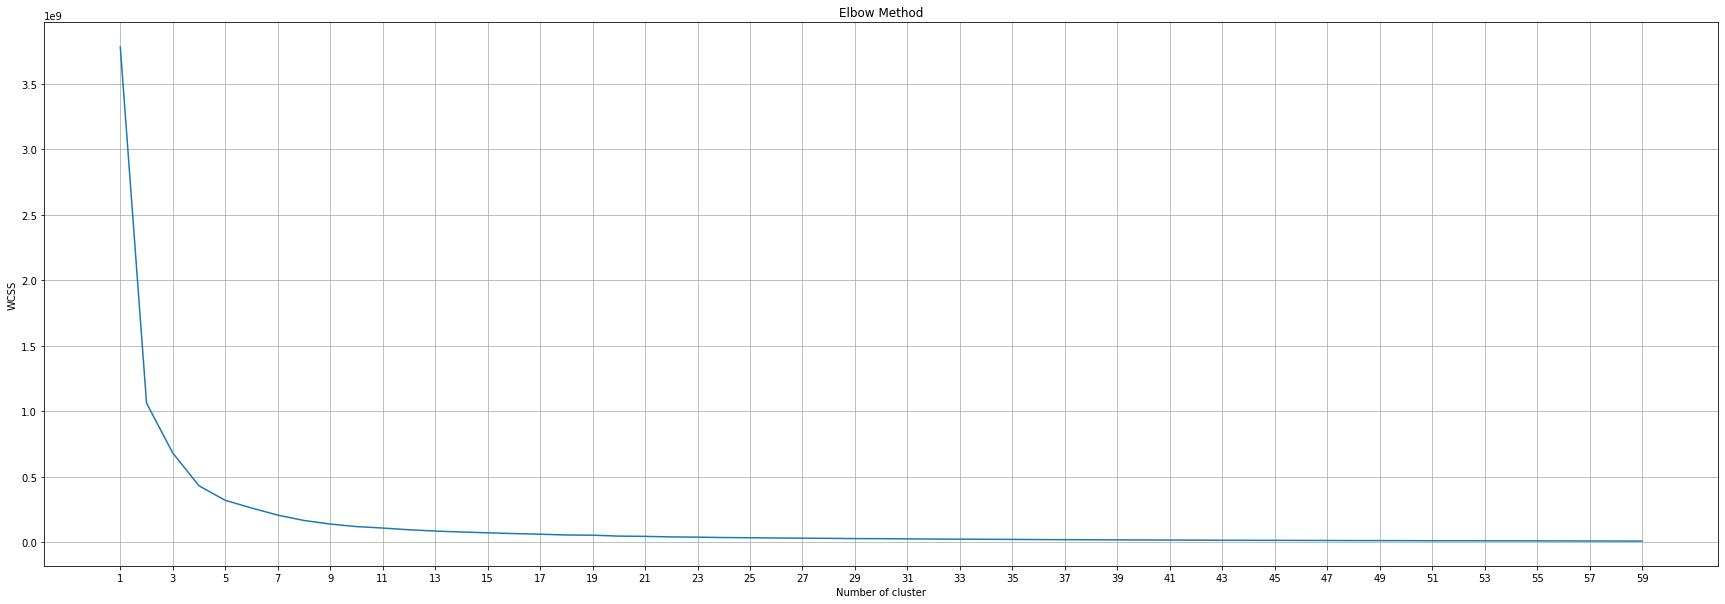

In [33]:
wcss = []
for i in range(1,60):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)


fig = plt.figure(figsize = (30,10))
plt.plot(range(1,60),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.xticks([j for j in range(1,60,2)])
plt.grid()
plt.show()

In [36]:
kmeans_cluster = KMeans(n_clusters = 4, max_iter = 250)
y_kmeans = kmeans_cluster.fit_predict(X_pca)          

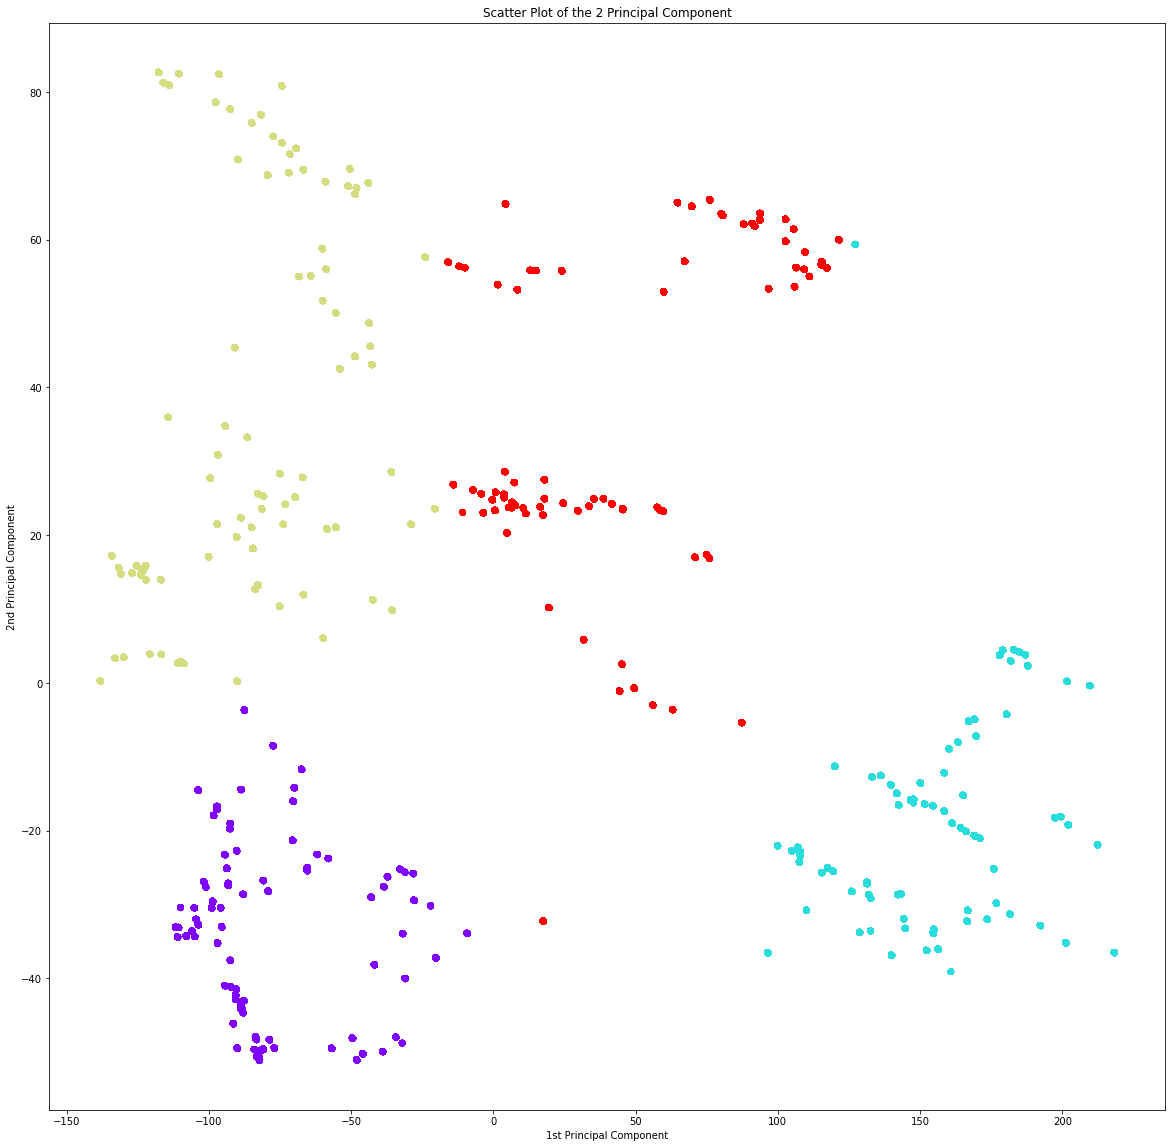

In [37]:
fig = plt.figure(figsize=(20, 20))
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_kmeans, s = 30, cmap='rainbow')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot of the 2 Principal Component')
plt.show()

In [43]:
davies_bouldin_score(X_pca, y_kmeans)

0.7170687752489848

In [45]:
def diameter(points):
    if points.shape[0] <= 1:
        return 0
    if points.shape[0] == 2:
        return ((points[0] - points[1]) ** 2).sum()
    hull = spatial.ConvexHull(points)
    candidates = points[spatial.ConvexHull(points).vertices]
    return spatial.distance_matrix(candidates, candidates).max()

In [46]:
def dunn_index(points, labels, centroids):
    max_dist = max(diameter(points[labels == i]) for i in np.unique(labels))
    cluster_dmat = spatial.distance_matrix(centroids, centroids)
    return max_dist

In [47]:
dunn_index(X_pca, y_kmeans, kmeans_cluster.cluster_centers_)

139.69745866685943